# House Prices: Advanced Regression Techniques
Predict sales prices and practice feature engineering, RFs, and gradient boosting

With 80 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

In [120]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px

pd.set_option("display.max_row", 100)
pd.set_option("display.max_column", 100)

In [121]:
data = pd.read_csv("data/train.csv")

# 1. Exploratory Data Analysis
---
# Goal
- have a better understanding of the dataset
- devellop a first strategie for modeling

# Checklist

### Shape Analysis
- __Target variable__: `SalePrice`
- __Rows & columns__: 1460, 81
- __Type of varaibles__: 
     - 38 quantitatives (35 int + 3 float)
     - 43 qualitatives (43 objects)
- __Mising values analysis__: 
    - Not to much NaN (69 columns whitout NaN)
    - NaN values give info about house's features:
        - Basement: 97.5%
        - Garage: 95%
        - Fireplace: 83%
        - Fence: 20%
        - Alley: 7%
        - Pool: 1%

### Substantive Analysis
- __Target visualization__ 
    - median : 163k , 50% between 129k and 214k , Skewed to the right  with some outliers. 
- __Meaning of variables__
    - qualitative: multiple categories (2 to 25)
    - quantitatives different type of distribution. We count 2 familly of important variables: Quality and Area
- __Relation variables / target__
    - *quality / target*:
      -  high correlation (62%< corr < 79%) except for the garage quality
    - *area / target*:
      - the living area above Ground as the garage, the first floor and the basement area have a strong link with the sale price (`GrlivArea` 71%, `GarageArea` 62%, `1stFlrSF` 61%, `TotalBsmtSF` 61%)
      - suprinsingly area of a potential pool and a possible 2nd floor are not really correlated with the saleprice (in that purpose we will create a boolean variable pool and 2nd floor)
    
    
### Detailed analysis
- __Relation variables/varaibles__
  - *area/area*: 
   - strong correlation between 1st floor area and the basement area
   - strong correlation between the above ground living area and the 2nd floor area which make a total sense 
  - *quality / quality*: 
      - quality varaibles are highly correlated together. Except for `GarageQuall` whit an average quality of 95%
  - *quality / area*:
      - correlation between area and and quality. People with big house seems to an higher quality house
  - *Neighboorhood*: 
      - not correlated with the quality as well as the area
- __Feature engineering__: weak correlation between price and house's features create with the NaN (pool, fence, alley, garage, basement and 2nd floor )


### Null hypothesis (H0): 
a comprendre puis a mettre en place




## Recap
 - 1460 instances of 80 estimators which is use to predict the target `SalePrice` of the house
 - 46 quantitatives for 35 qualitatives variables
 - 2 important familly of variables: Area and Quality both  have a strong correlation with the target
 - NaN values are usefull for detecting house's features such as pool, garage, fence...
 - quality varaibles are highly correlated to each other
 - some area variables are also dependent such as 1st floor area and basement
 

## Shape Analysis

In [122]:
housing_price = data.copy()

In [123]:
housing_price.shape

(1460, 81)

### Type of variables

In [124]:
housing_price.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [125]:
# float can be converted as int: sum of Euclidian rest egal to 0 
for col in housing_price.select_dtypes("float"):
    print(housing_price[col].map(lambda x: x%1).sum())

0.0
0.0
0.0


### Missing values

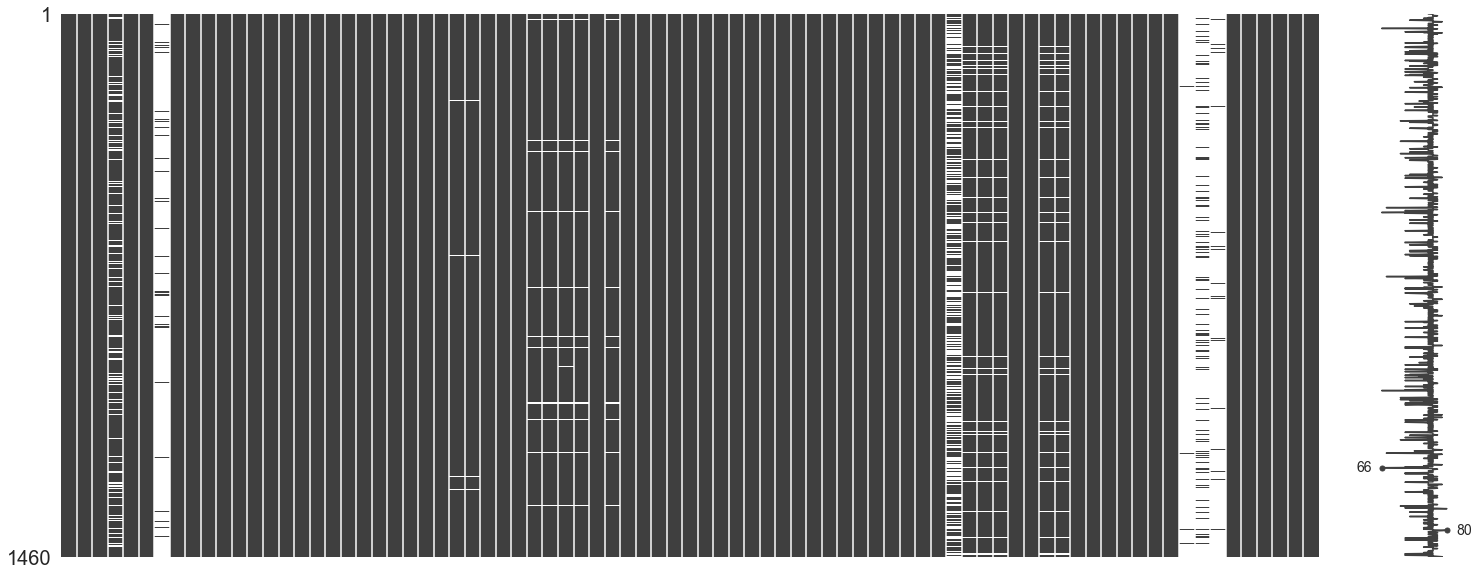

In [126]:
import missingno as msno
msno.matrix(housing_price)

In [127]:
housing_price.isna().any(0).value_counts()

False    62
True     19
dtype: int64

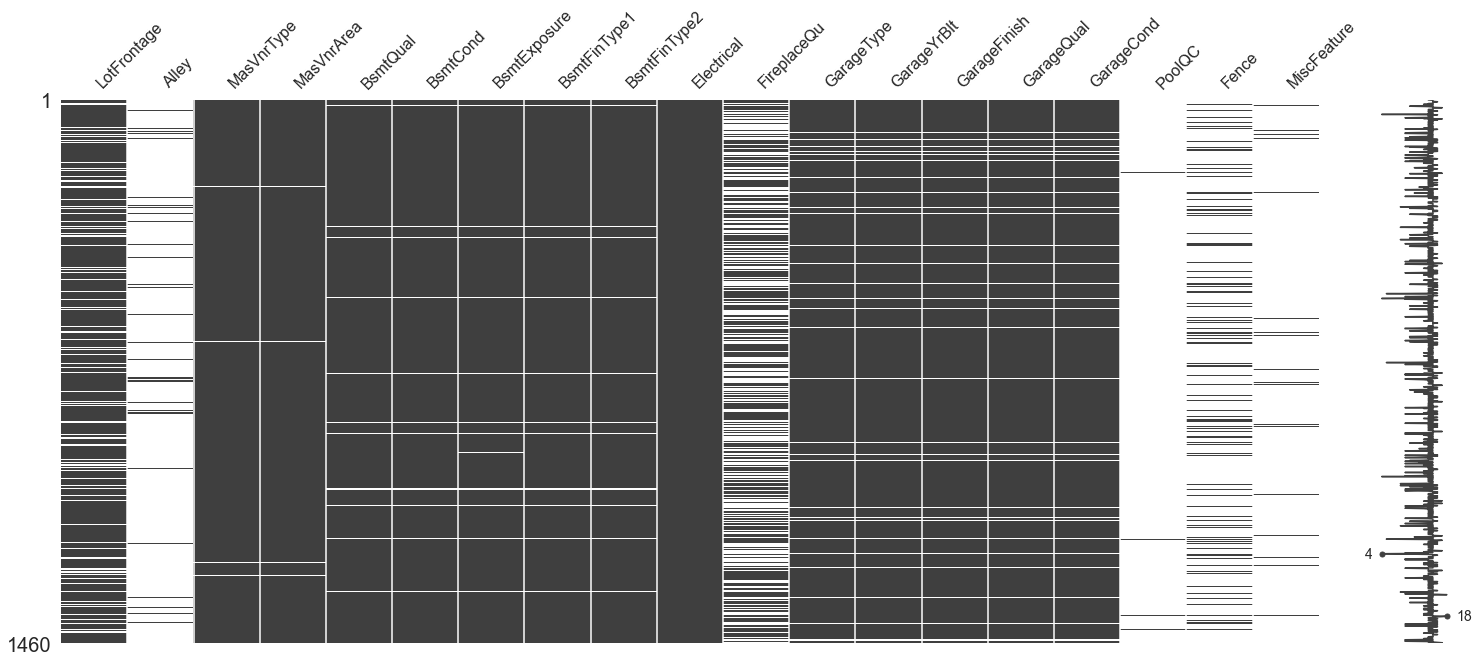

In [128]:
col_with_nan = housing_price.loc[:,housing_price.isna().any(0)]
msno.matrix(col_with_nan)

In [129]:
missing_rate = (housing_price.isna().sum()/housing_price.shape[0]).sort_values(ascending=False)
missing_rate

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
LotFrontage      0.177397
GarageCond       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GarageFinish     0.055479
GarageQual       0.055479
BsmtExposure     0.026027
BsmtFinType2     0.026027
BsmtFinType1     0.025342
BsmtCond         0.025342
BsmtQual         0.025342
MasVnrArea       0.005479
MasVnrType       0.005479
Electrical       0.000685
Utilities        0.000000
YearRemodAdd     0.000000
MSSubClass       0.000000
Foundation       0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior2nd      0.000000
Exterior1st      0.000000
RoofMatl         0.000000
RoofStyle        0.000000
YearBuilt        0.000000
LotConfig        0.000000
OverallCond      0.000000
OverallQual      0.000000
HouseStyle       0.000000
BldgType         0.000000
Condition2       0.000000
BsmtFinSF1       0.000000
MSZoning         0.000000
LotArea     

## Substantive Analysis

### Targets visu

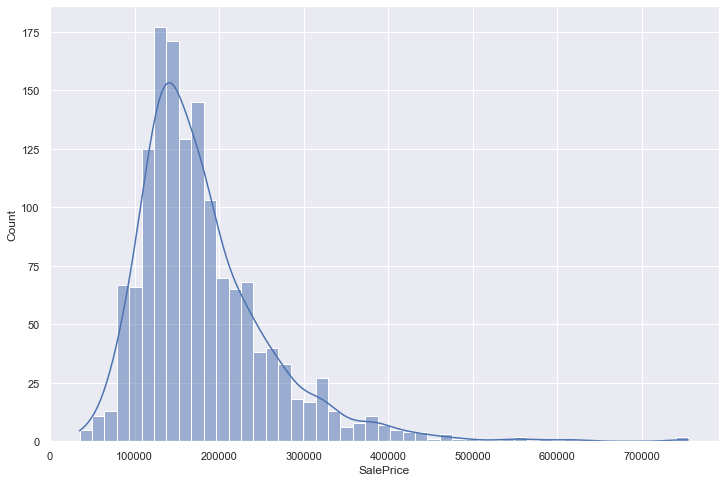

In [130]:
plt.figure(figsize=(12,8))
sns.histplot(housing_price["SalePrice"], kde=True)

In [131]:
fig = px.box(housing_price,y="SalePrice")
fig.show()

### Variables distribution
categorical varaibles: `MSSubClass`, `OverallQual`, `OverallCond`, `BsmtFullBath`

Id------------------------------------------------1460
MSSubClass----------------------------------------15
LotArea-------------------------------------------1073
OverallQual---------------------------------------10
OverallCond---------------------------------------9
YearBuilt-----------------------------------------112
YearRemodAdd--------------------------------------61
BsmtFinSF1----------------------------------------637
BsmtFinSF2----------------------------------------144
BsmtUnfSF-----------------------------------------780
TotalBsmtSF---------------------------------------721
1stFlrSF------------------------------------------753
2ndFlrSF------------------------------------------417
LowQualFinSF--------------------------------------24
GrLivArea-----------------------------------------861
BsmtFullBath--------------------------------------4
BsmtHalfBath--------------------------------------3
FullBath------------------------------------------4
HalfBath------------------------------

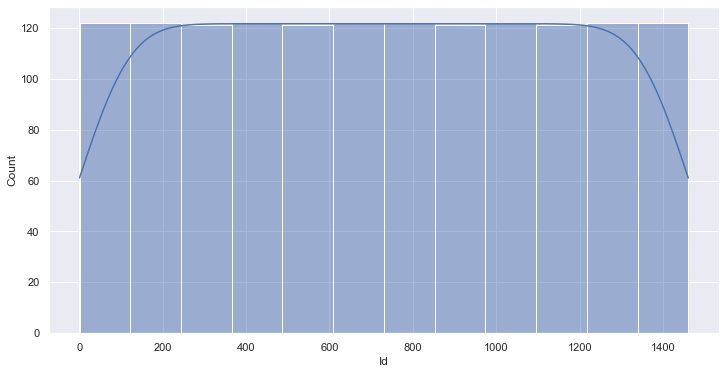

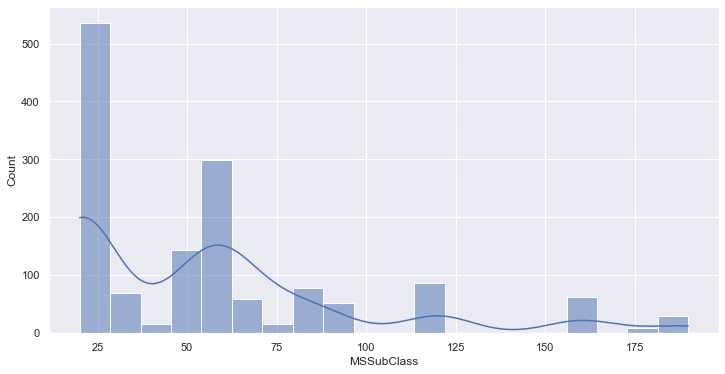

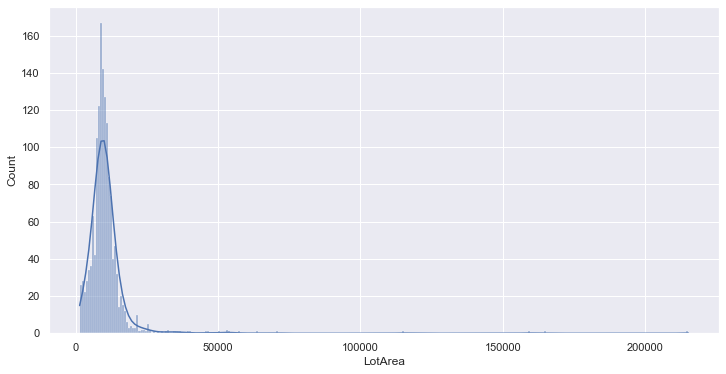

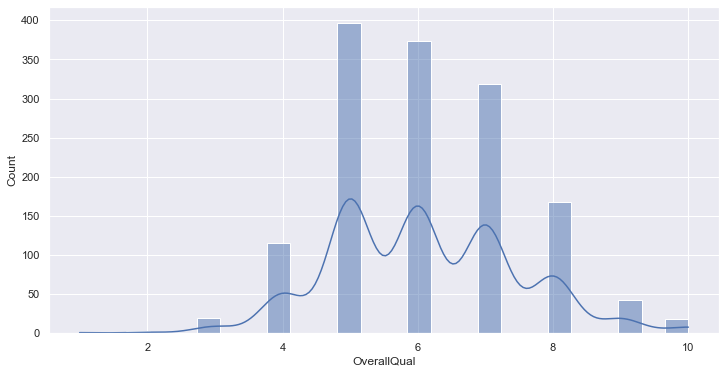

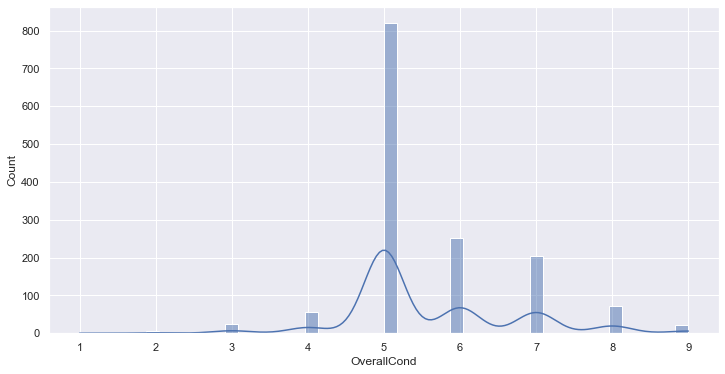

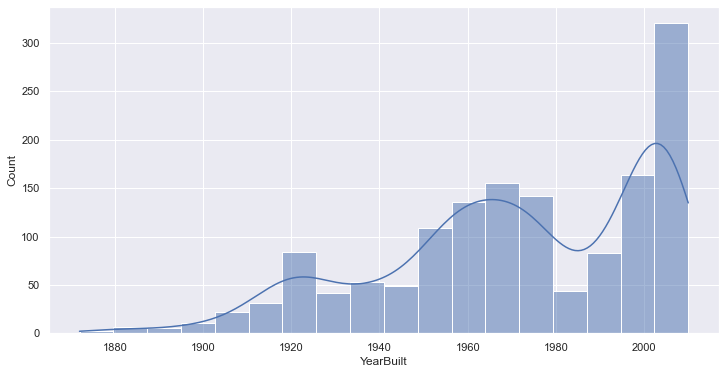

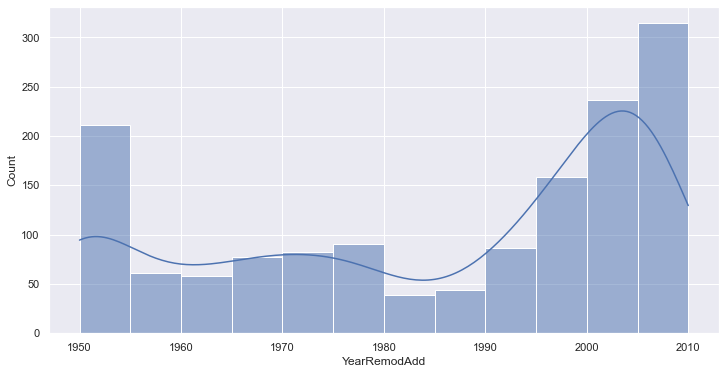

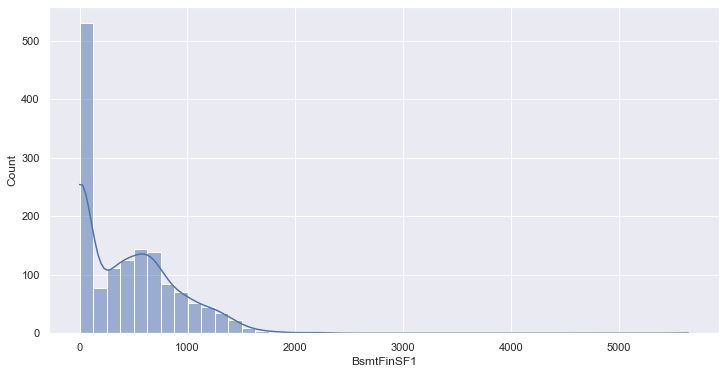

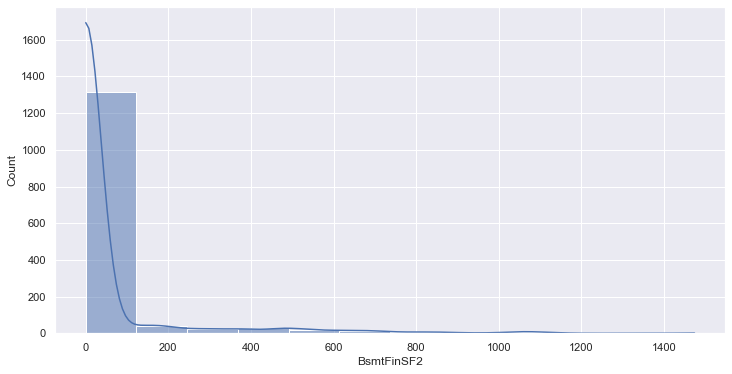

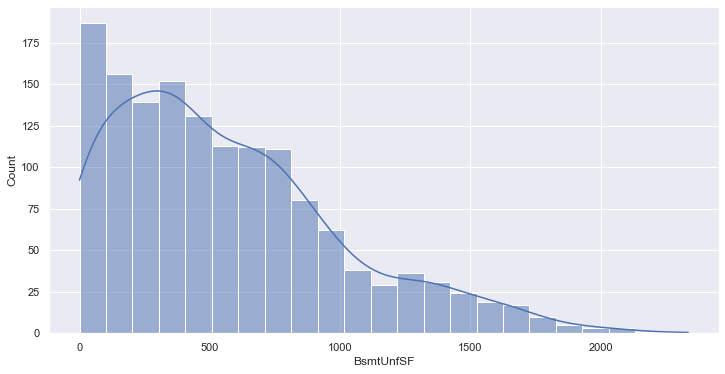

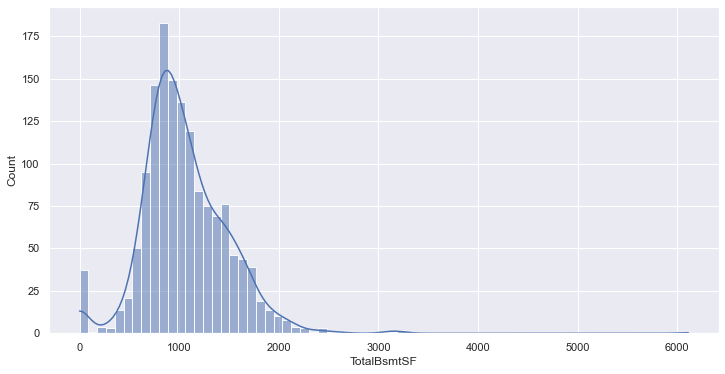

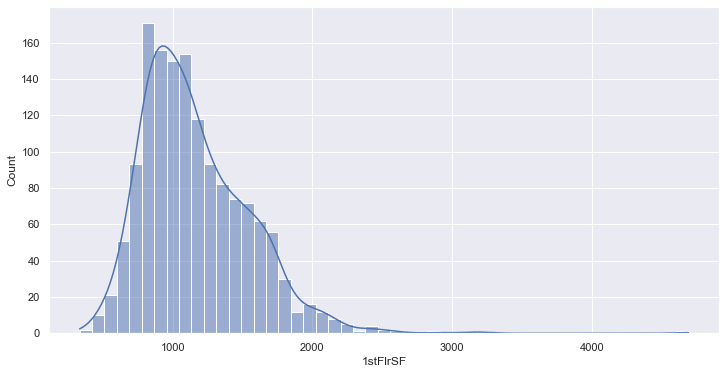

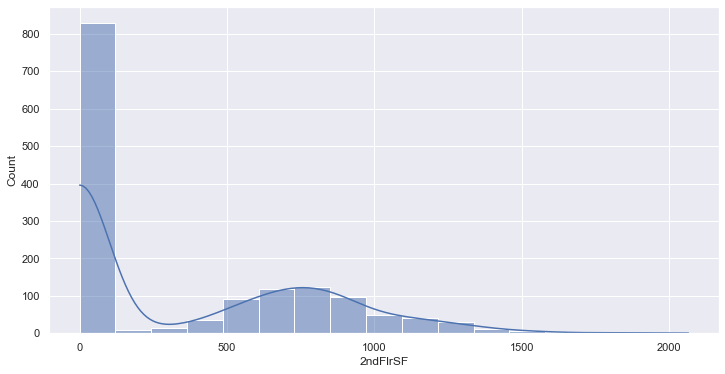

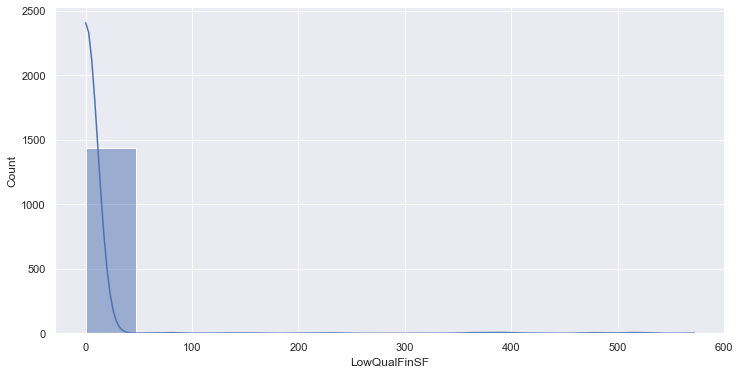

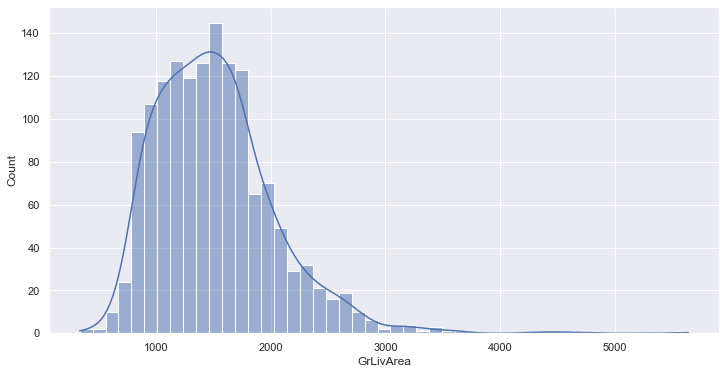

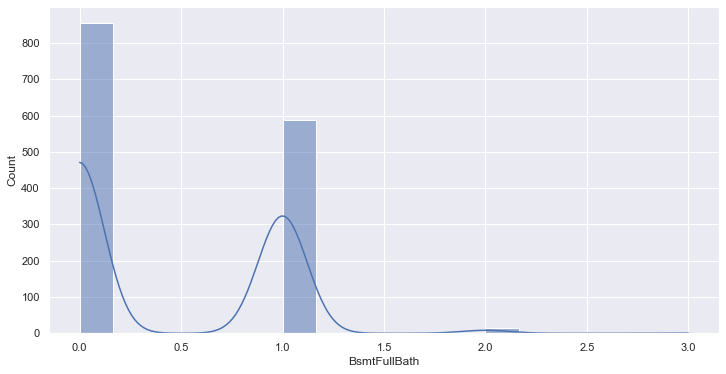

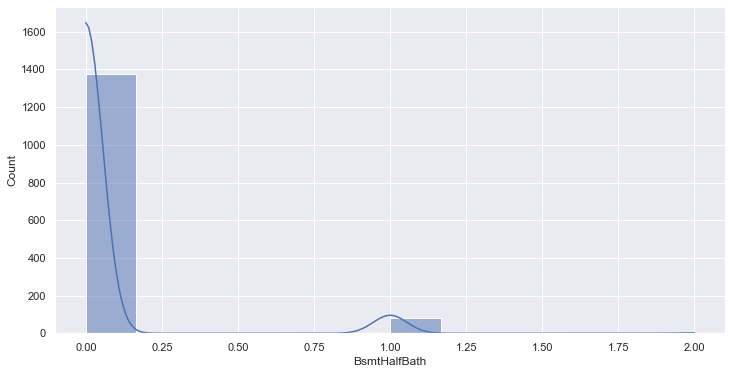

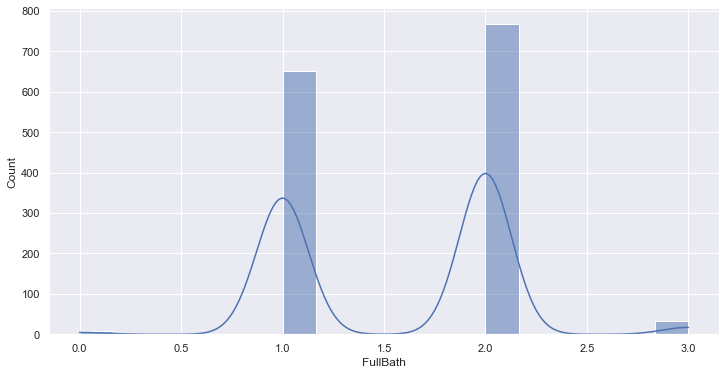

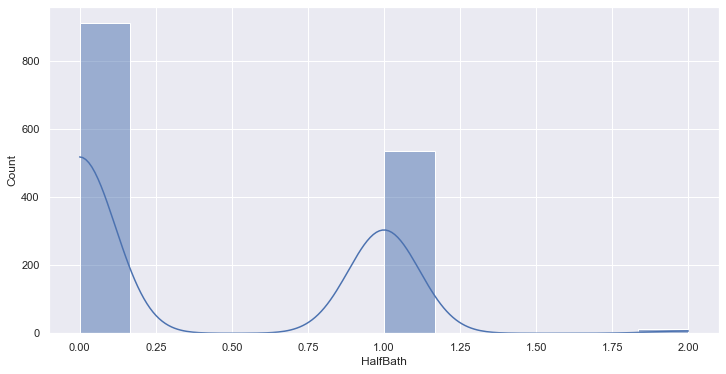

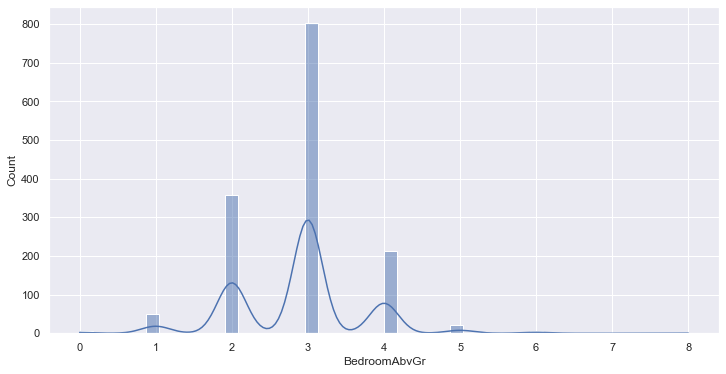

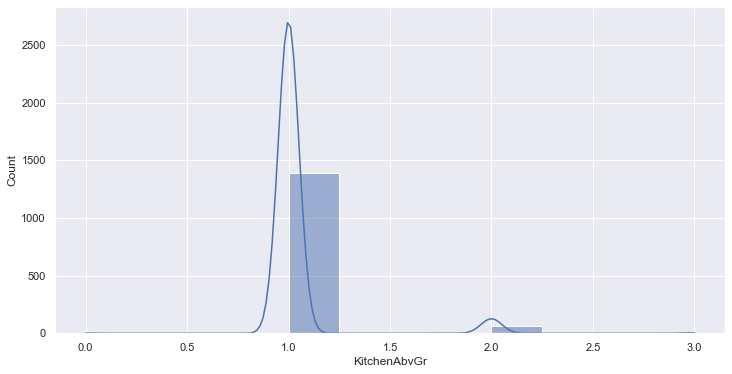

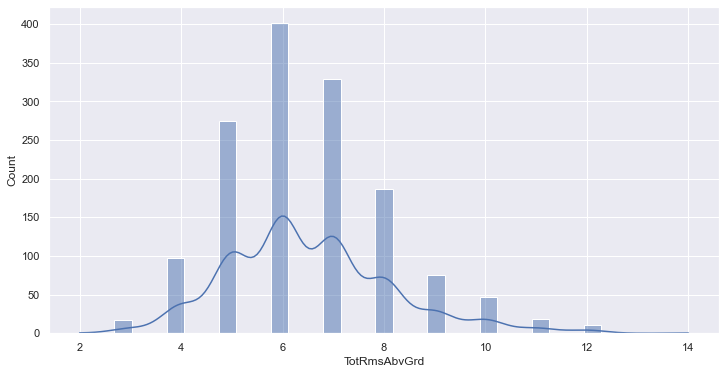

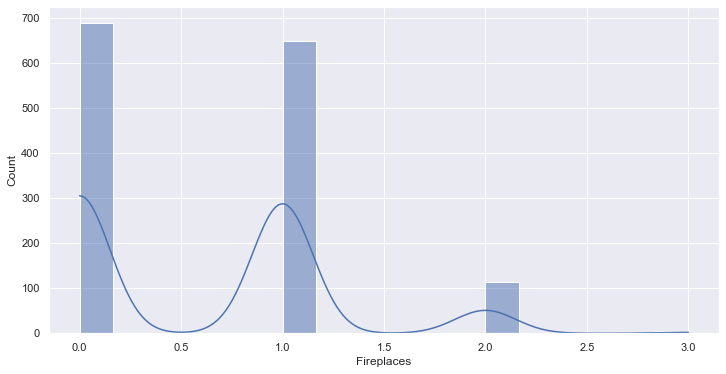

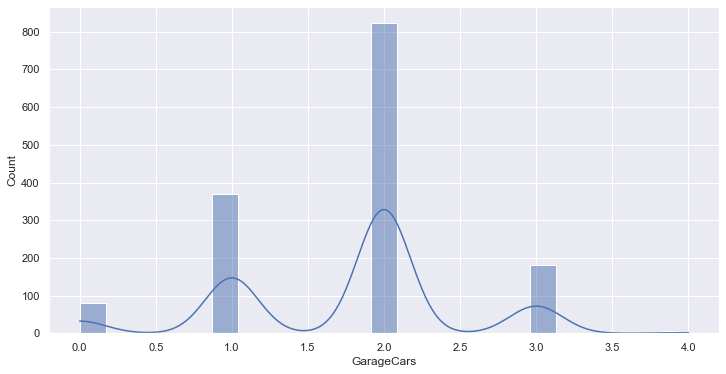

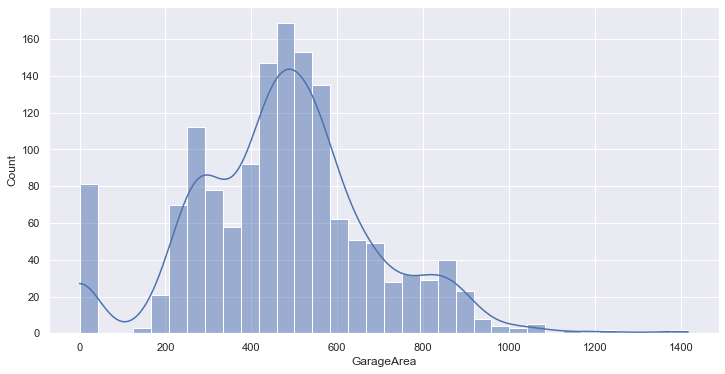

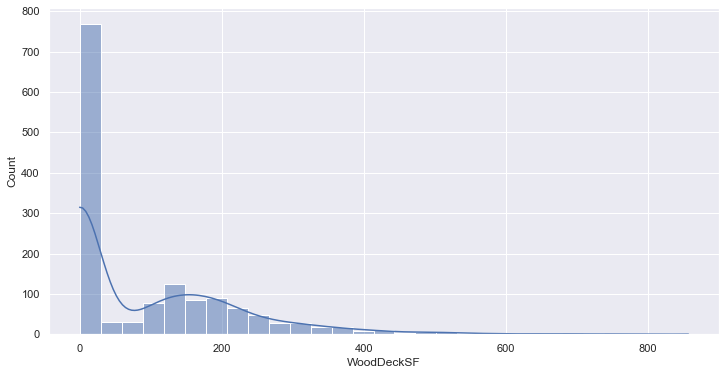

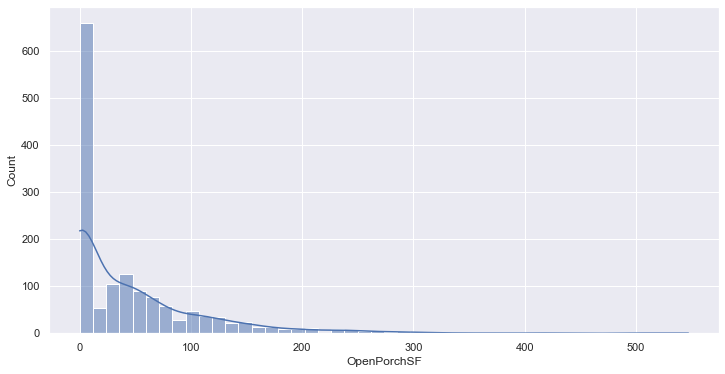

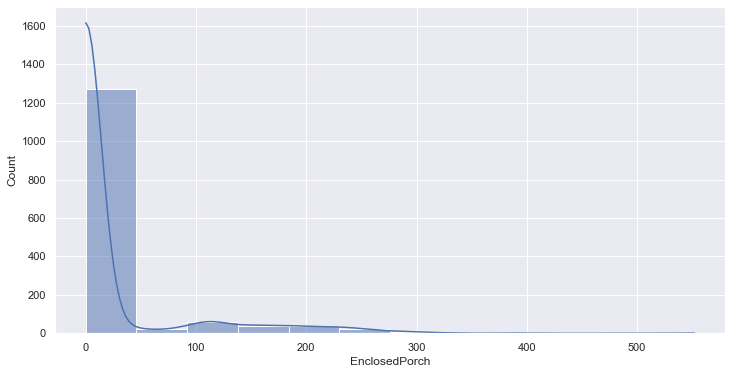

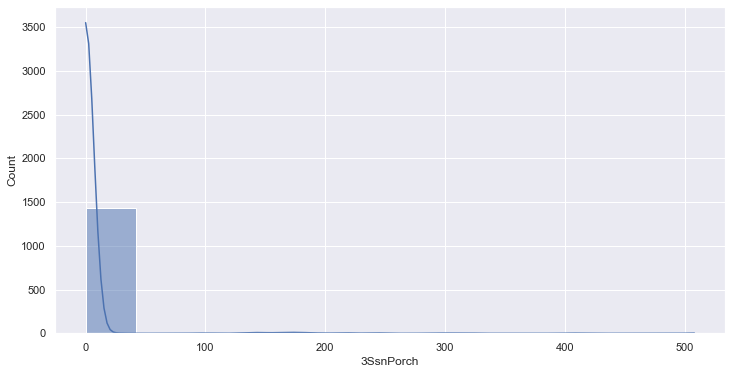

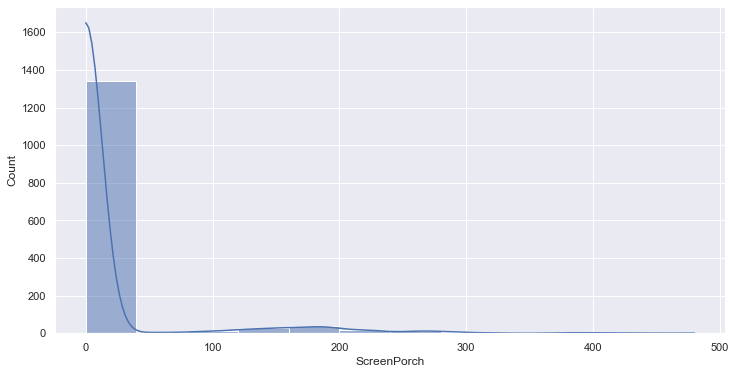

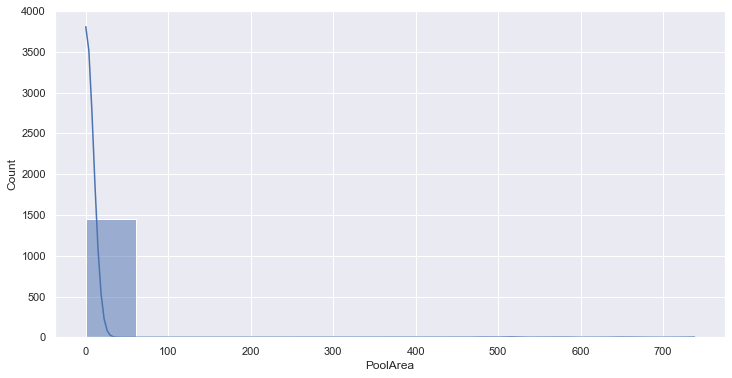

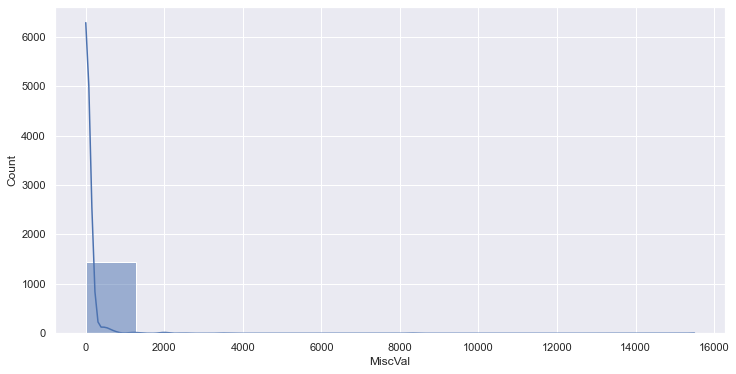

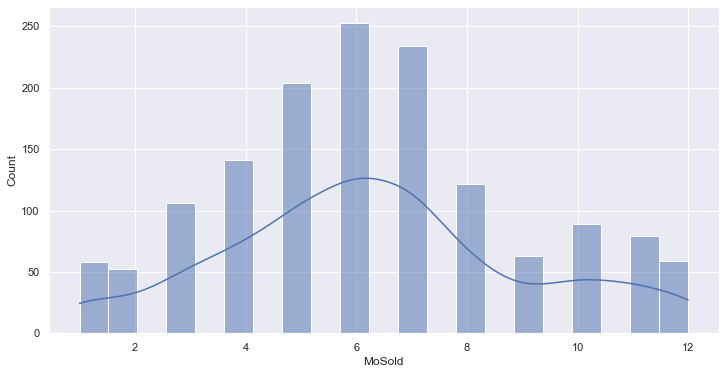

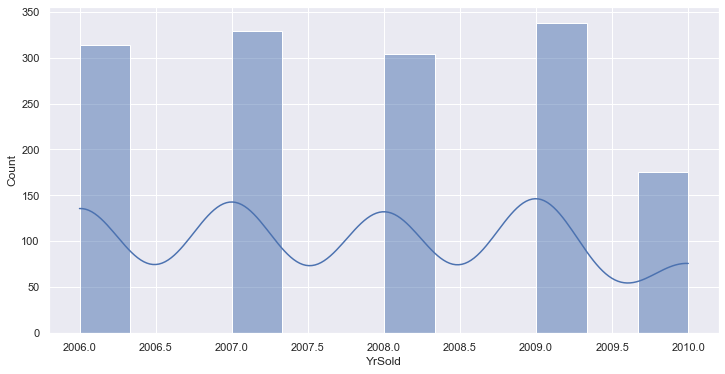

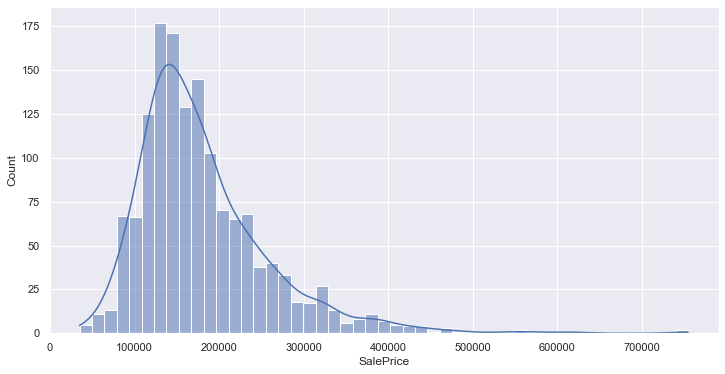

In [132]:
import matplotlib as mpl
mpl.rcParams["figure.max_open_warning"] = 0
             
for col in housing_price.select_dtypes("int"):
        print(f"{col:-<50}{len(housing_price[col].unique())}")
        plt.figure(figsize=(12,6))
        sns.histplot(housing_price[col], kde=True)

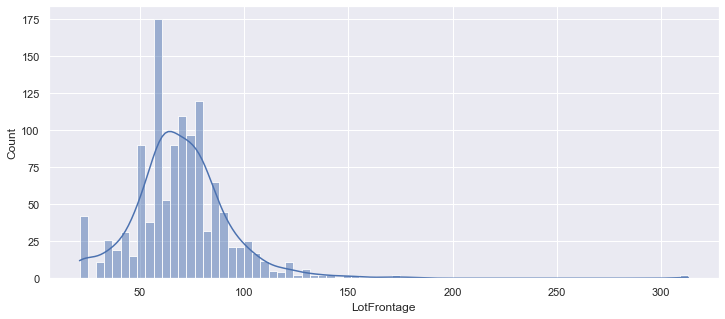

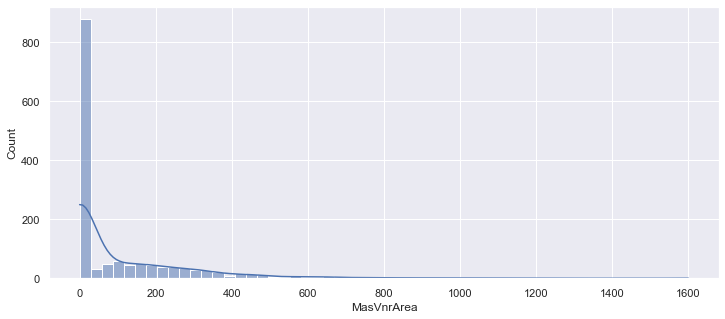

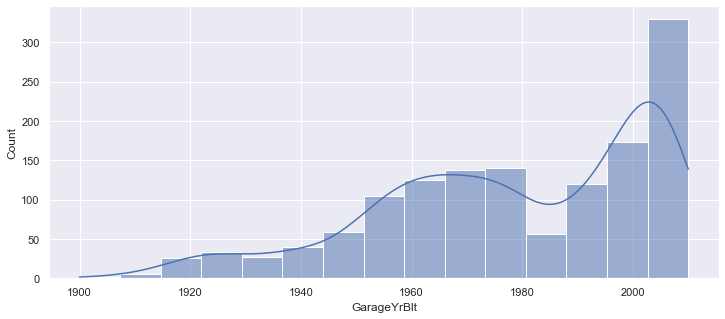

In [133]:
for col in housing_price.select_dtypes("float"):
    plt.figure(figsize=(12,5))
    sns.histplot(housing_price[col], kde=True) 

MSZoning------------------------------------------5
['RL' 'RM' 'C (all)' 'FV' 'RH']

Street--------------------------------------------2
['Pave' 'Grvl']

Alley---------------------------------------------3
[nan 'Grvl' 'Pave']

LotShape------------------------------------------4
['Reg' 'IR1' 'IR2' 'IR3']

LandContour---------------------------------------4
['Lvl' 'Bnk' 'Low' 'HLS']

Utilities-----------------------------------------2
['AllPub' 'NoSeWa']

LotConfig-----------------------------------------5
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

LandSlope-----------------------------------------3
['Gtl' 'Mod' 'Sev']

Neighborhood--------------------------------------25
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Condition1----------------------------------------9
['Norm' 'Feedr' 'PosN'

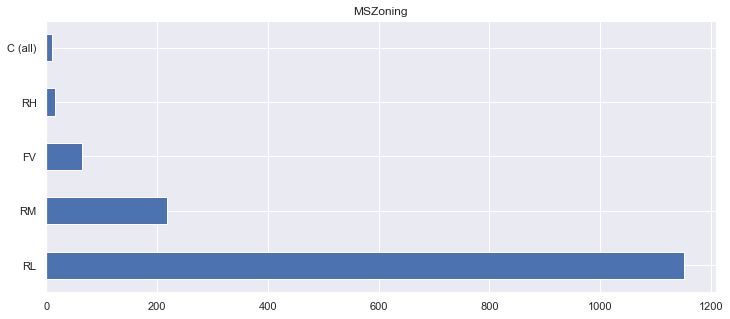

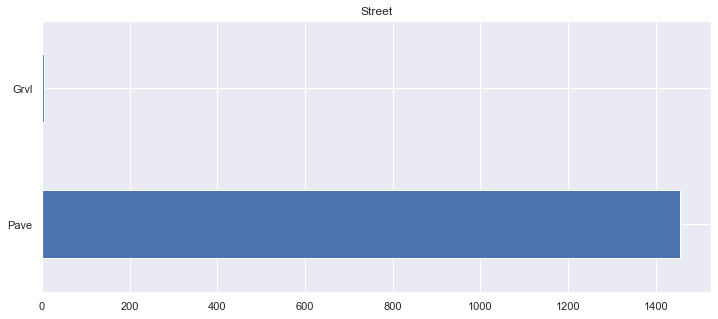

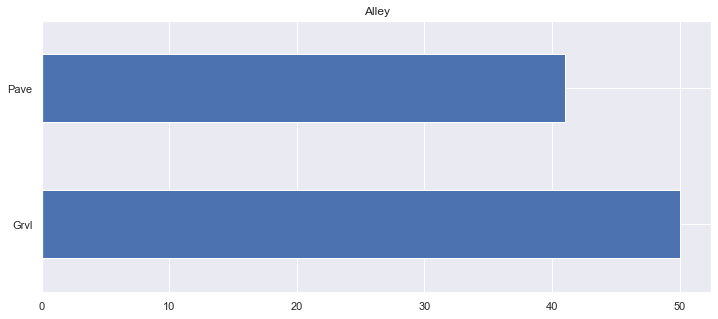

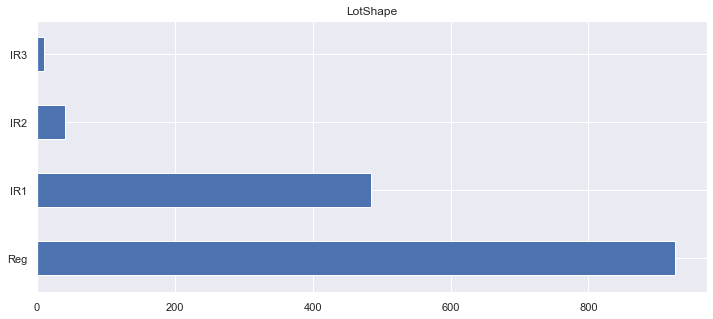

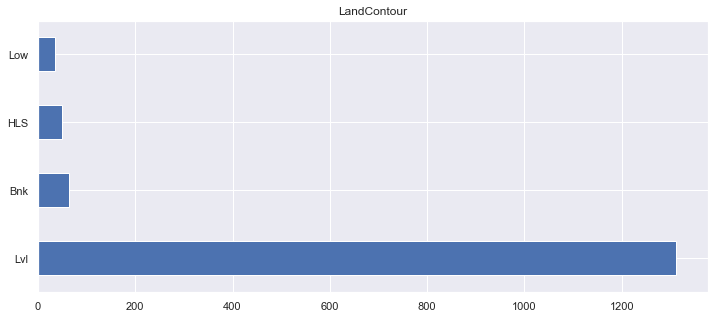

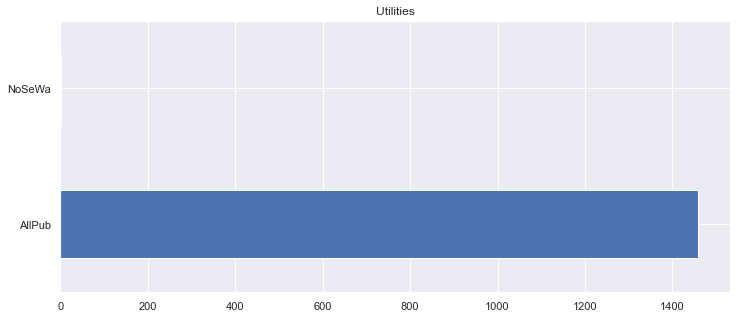

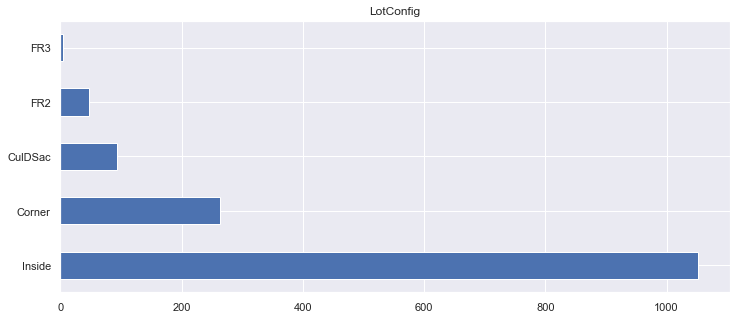

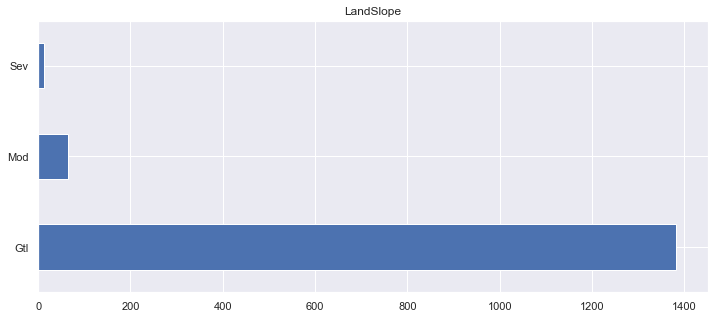

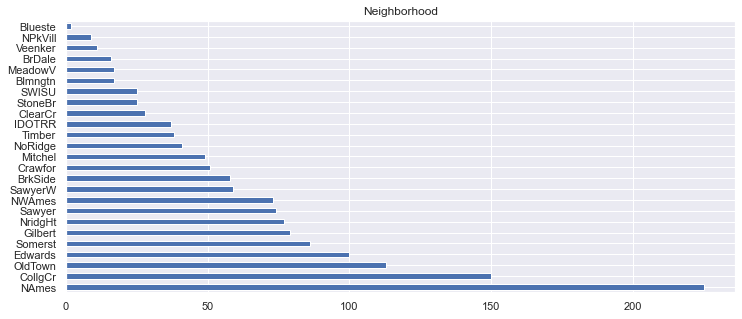

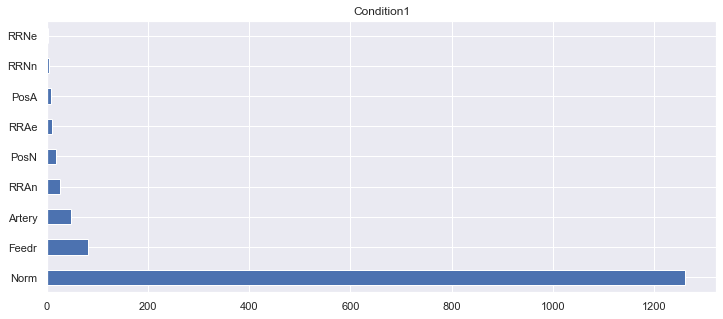

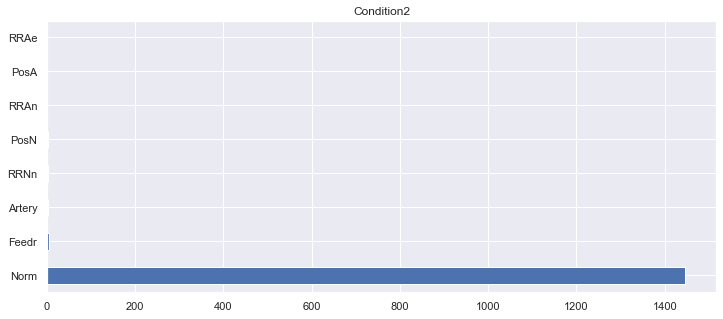

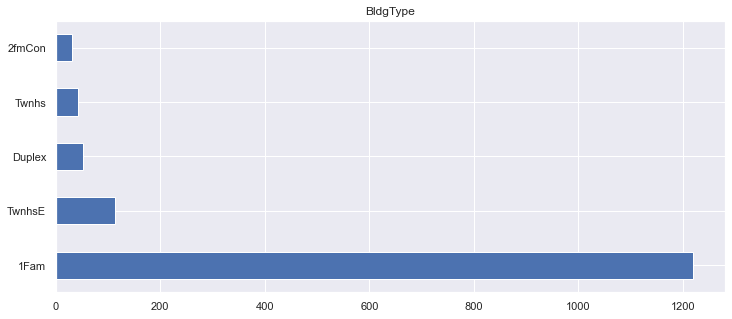

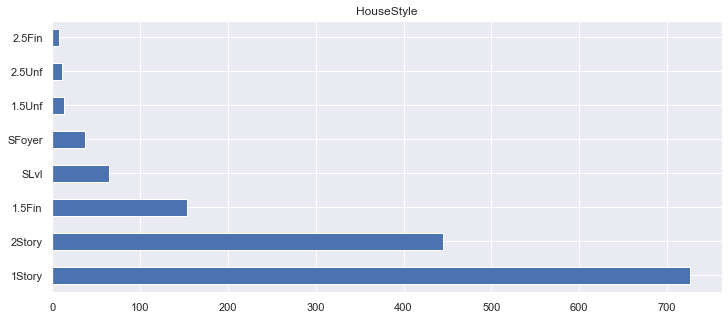

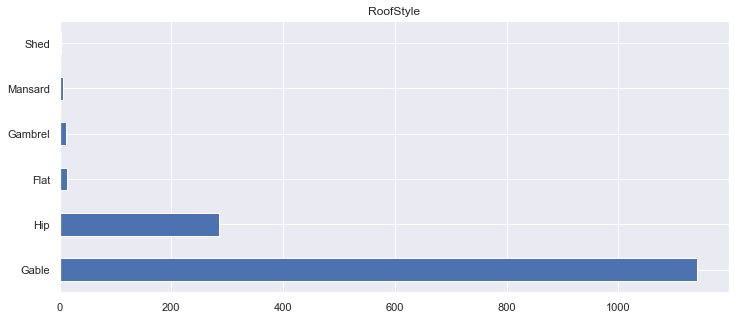

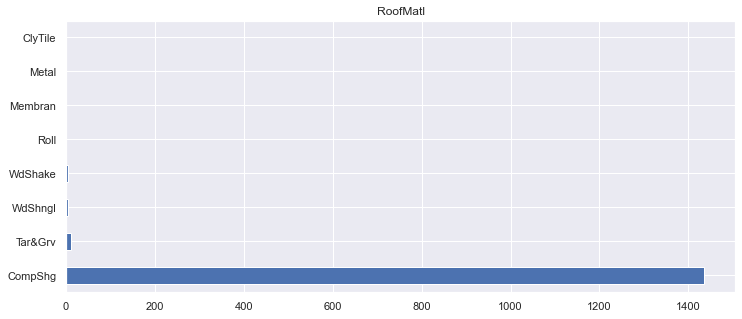

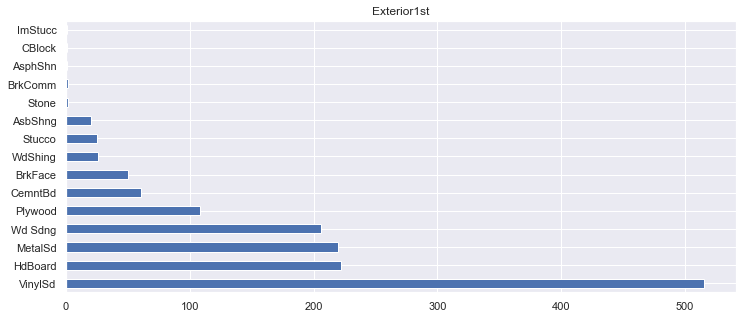

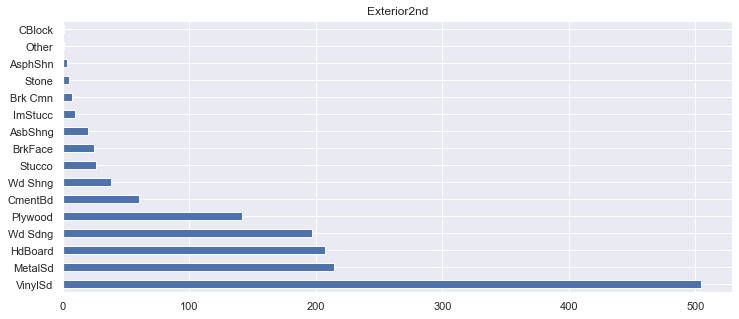

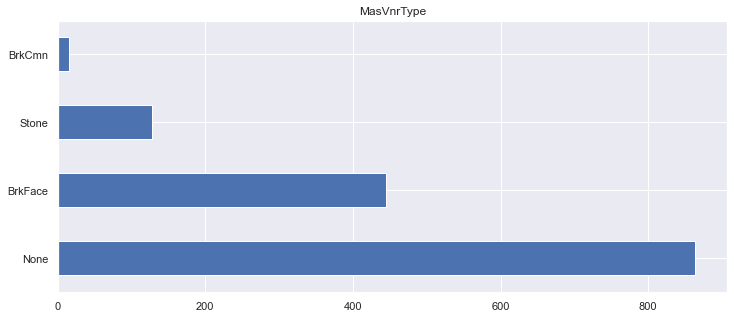

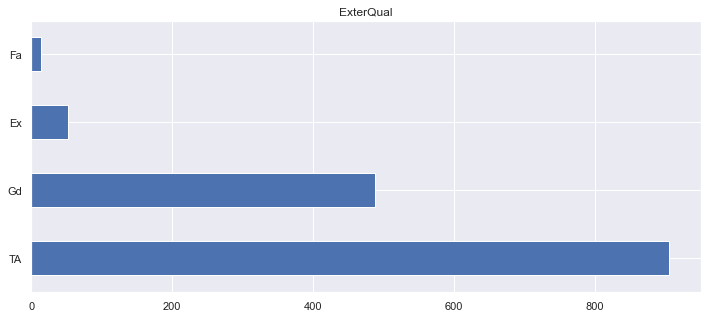

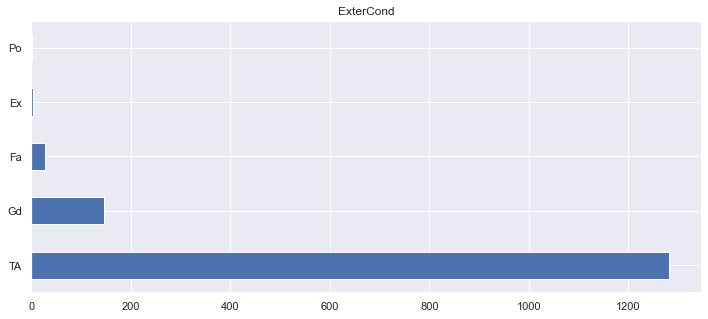

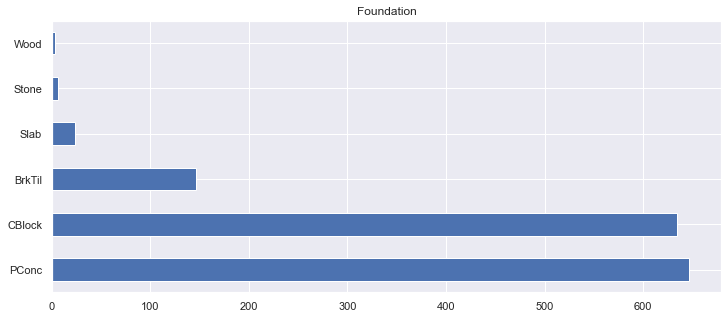

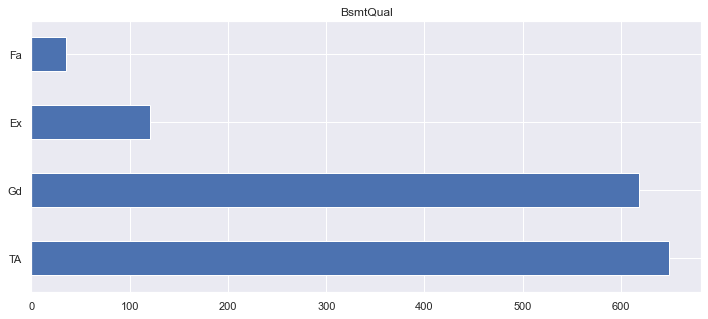

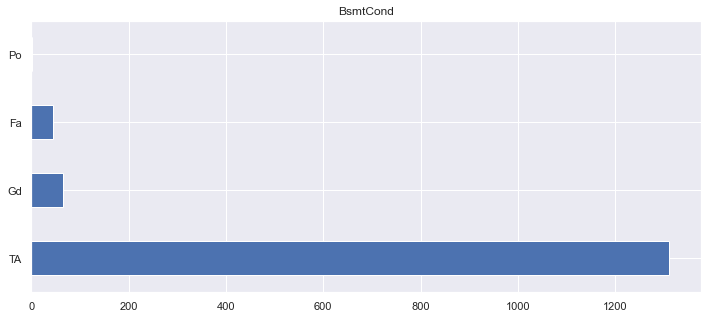

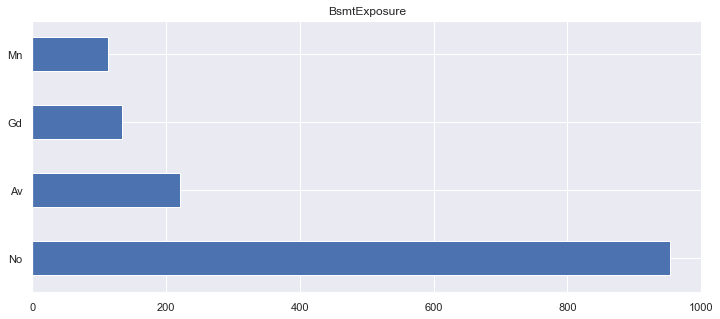

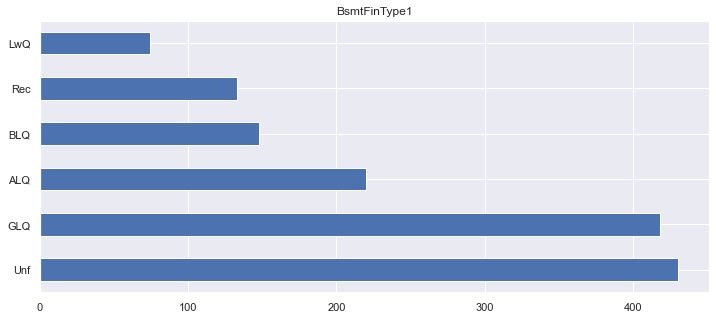

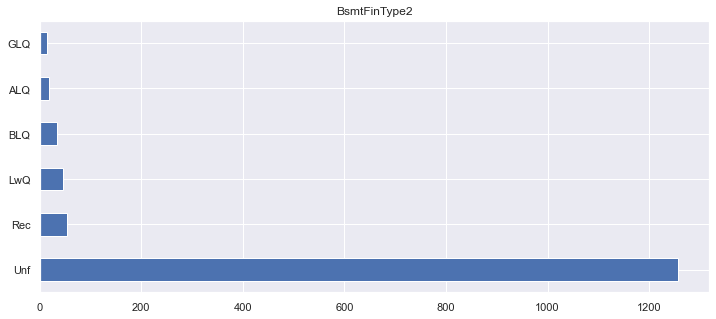

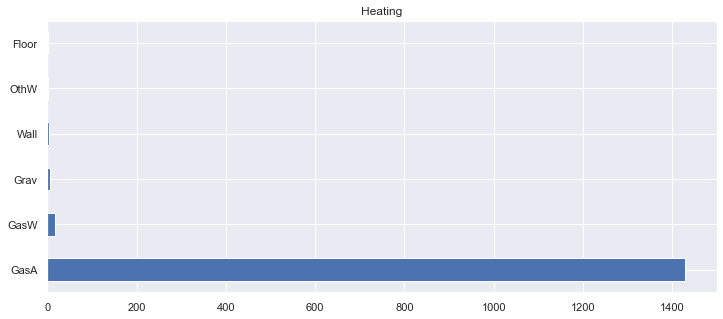

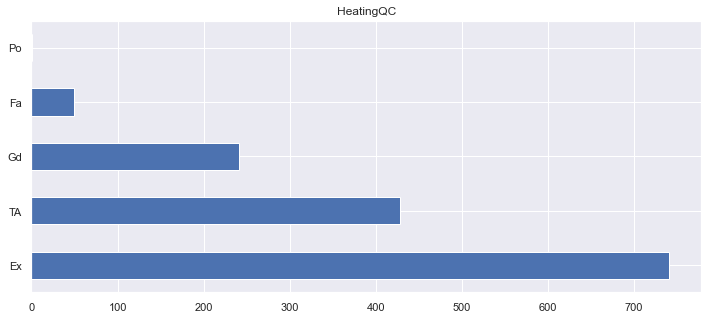

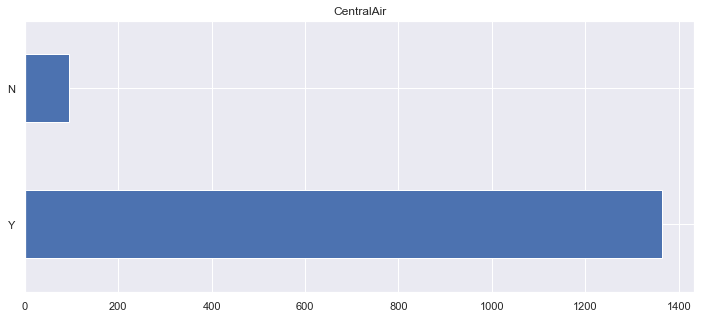

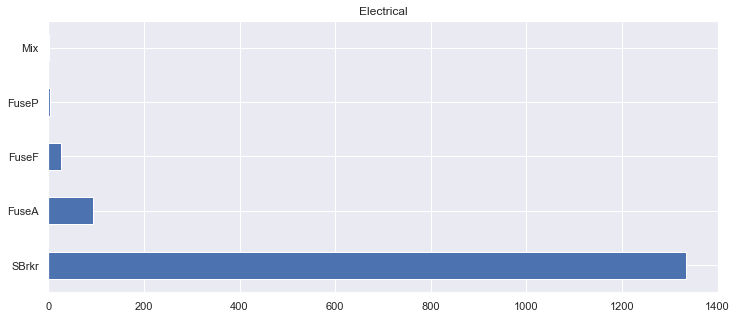

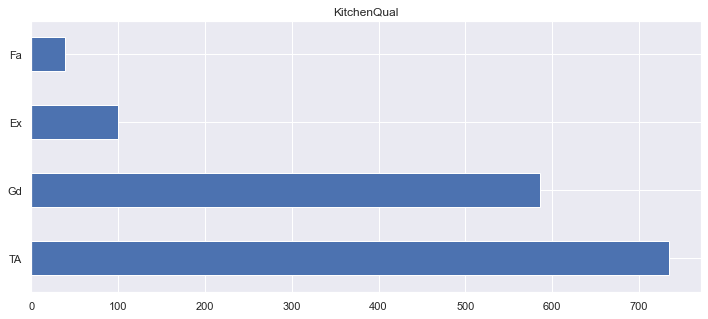

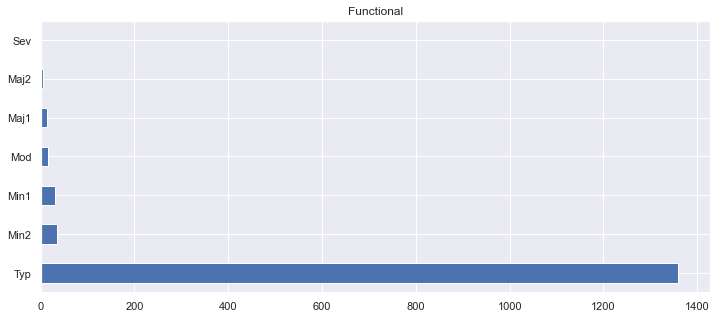

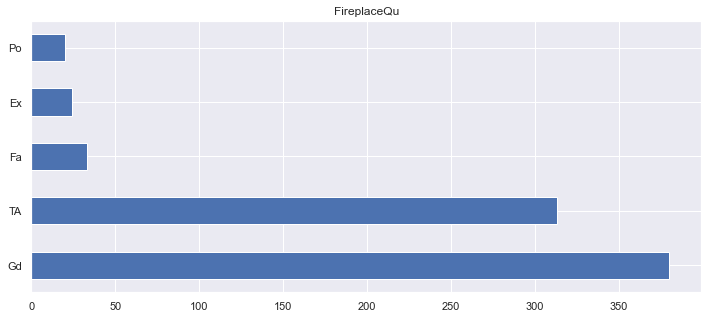

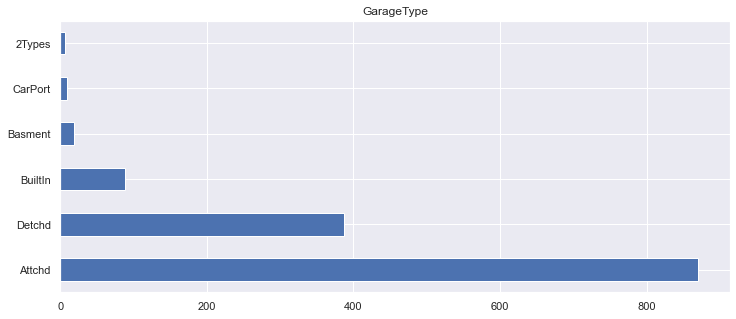

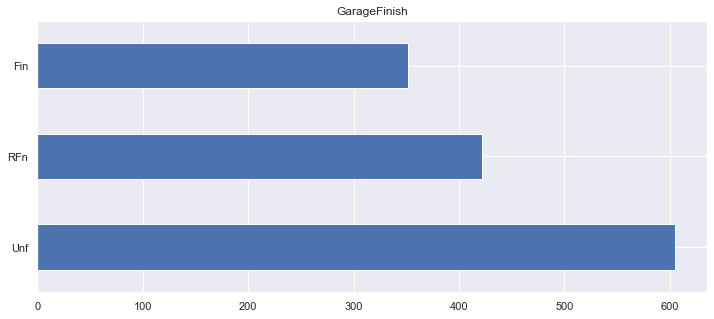

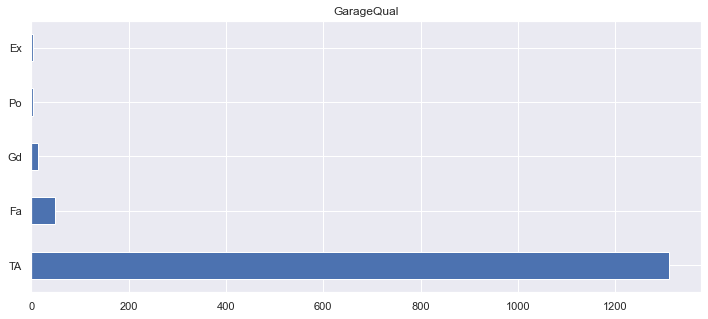

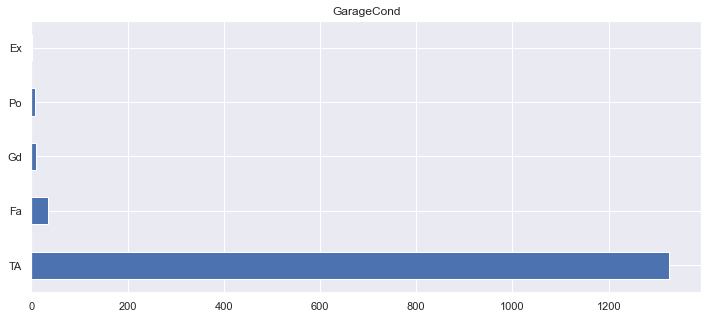

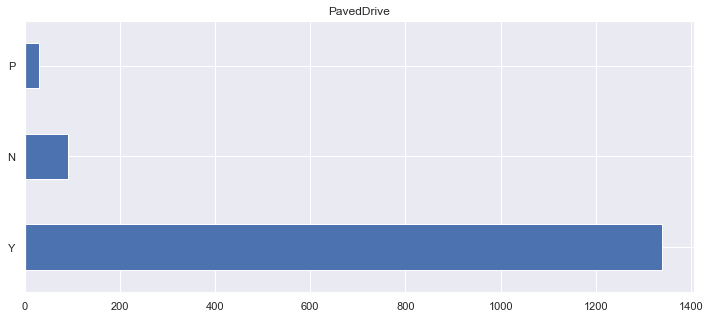

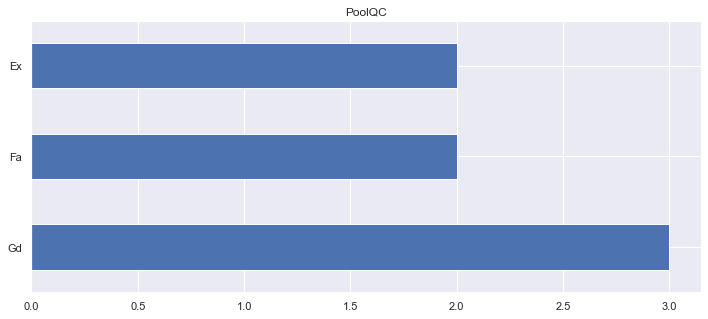

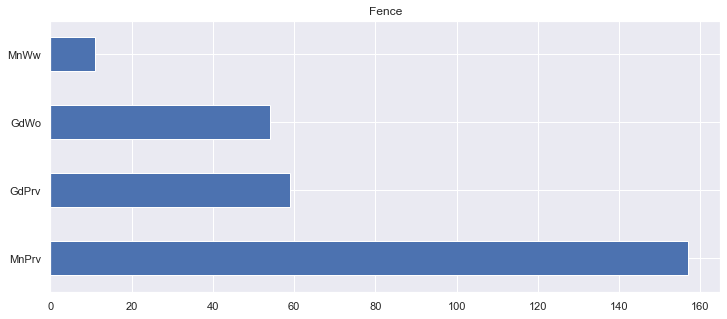

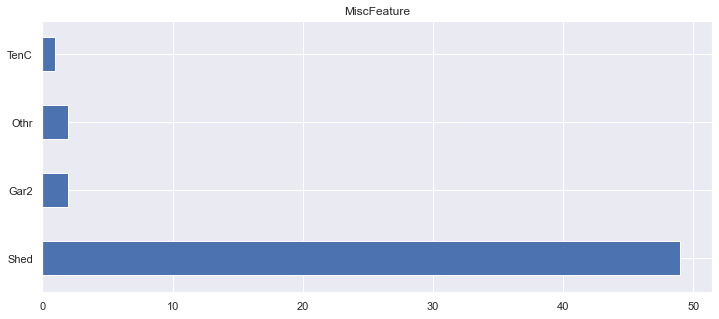

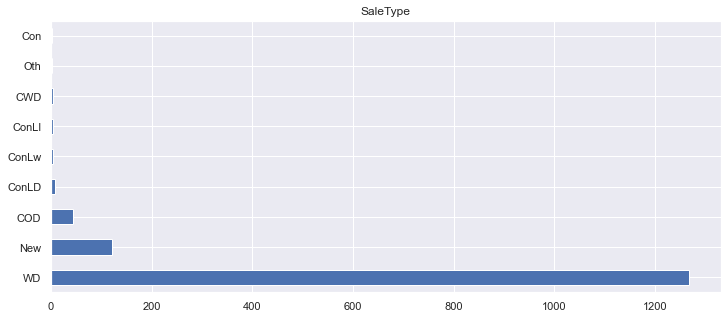

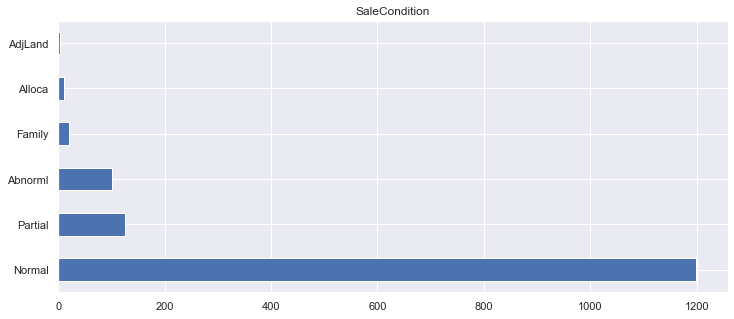

In [134]:
# only categorical data no text
for col in housing_price.select_dtypes("object"):
    print(f"{col:-<50}{len(housing_price[col].unique())}")
    print(f"{housing_price[col].unique()}")
    print()
    
    plt.figure(figsize=(12,5))
    housing_price[col].value_counts().plot.barh(title=col)

Ex → Excellent  
Gd → Good  
TA → Typical/Average  
Fa → Fair  
Po → Poor  
NA → No Garage

## Relation variables / target

### int & float variables

In [135]:
corr_matrix = housing_price.corr()
corr_to_target = corr_matrix["SalePrice"].sort_values(ascending=False)
corr_to_target

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

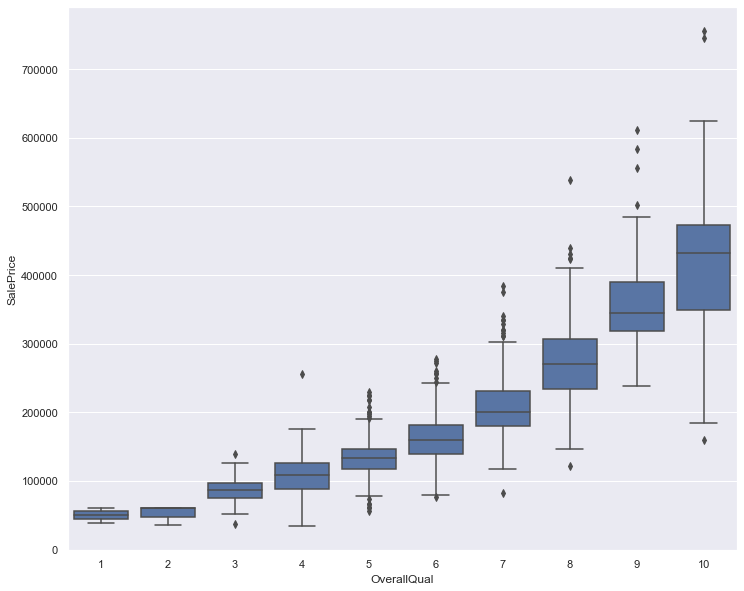

In [136]:
# OverallQual
plt.figure(figsize=(12,10))
sns.boxplot(x="OverallQual", y="SalePrice", data=housing_price, color='b')

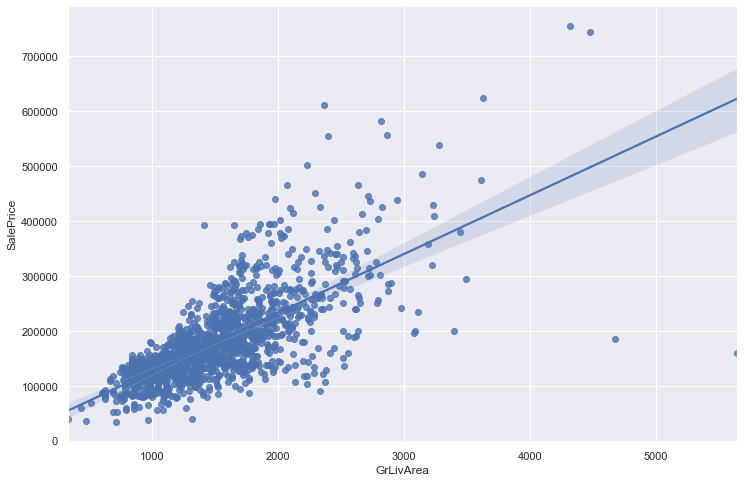

In [137]:
# GrLivArea
plt.figure(figsize=(12,8))
sns.regplot(x="GrLivArea", y="SalePrice", data=housing_price)

### strings cat variables

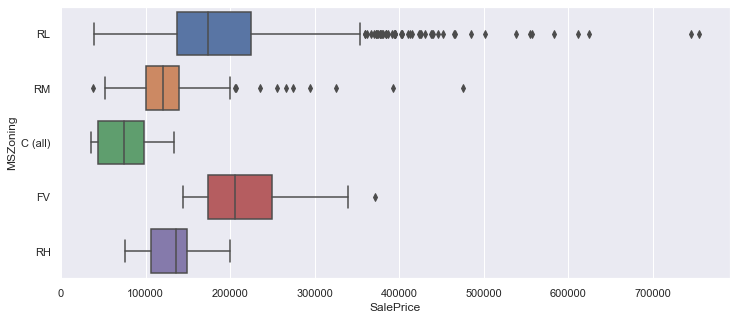

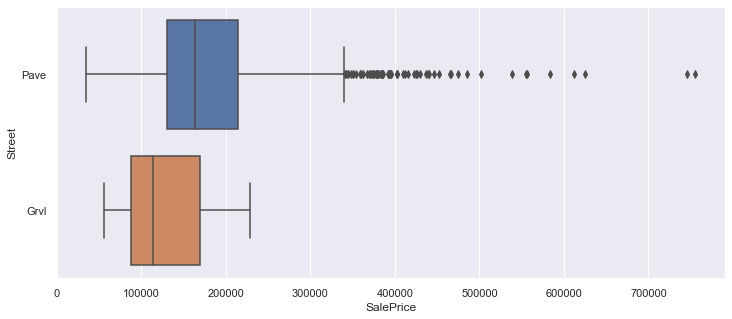

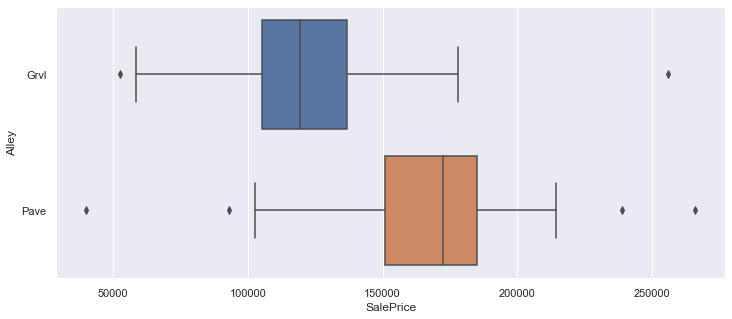

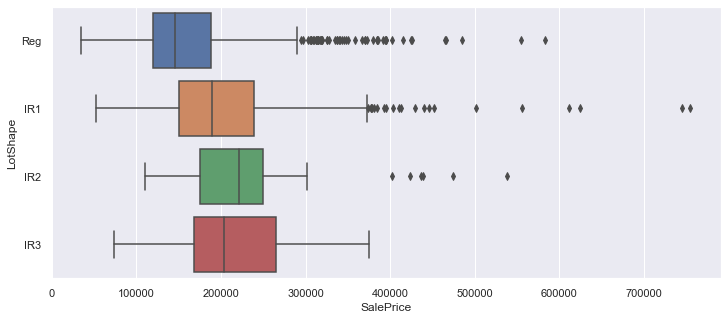

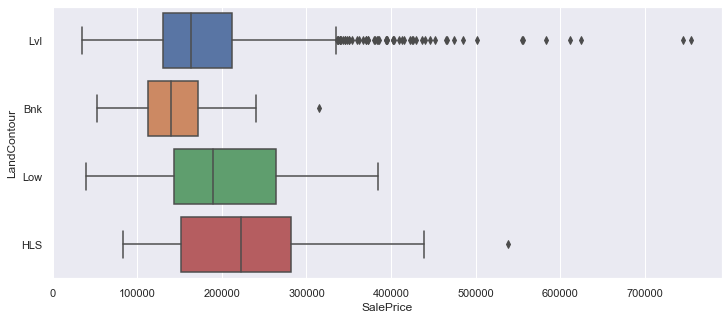

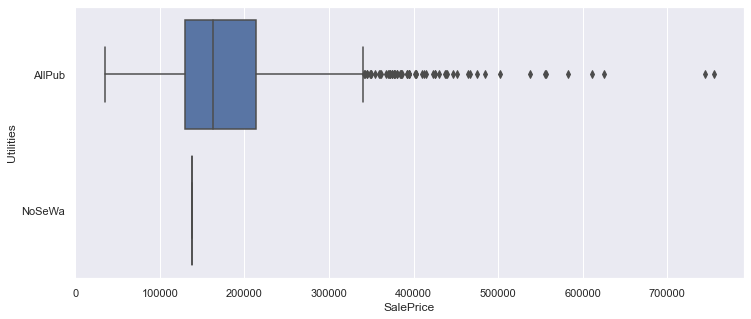

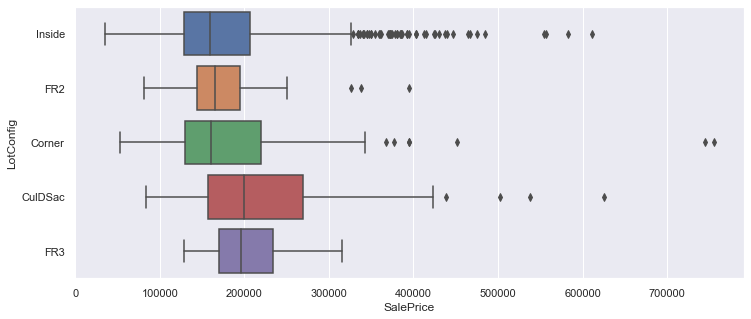

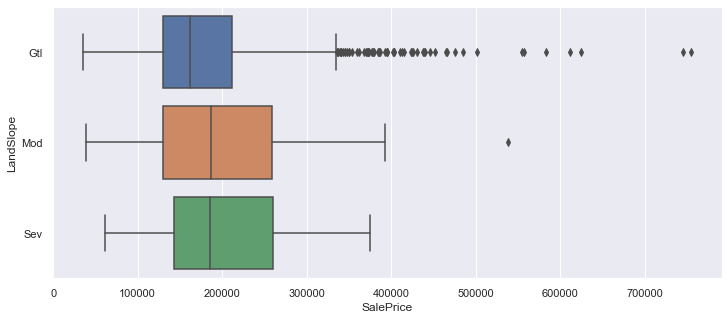

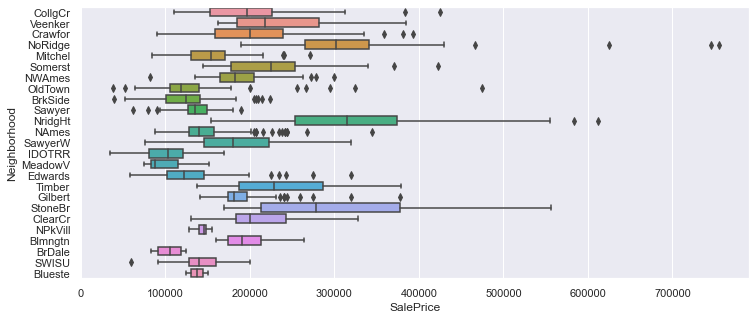

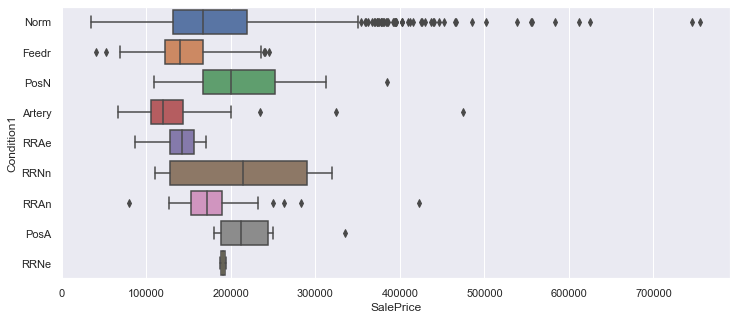

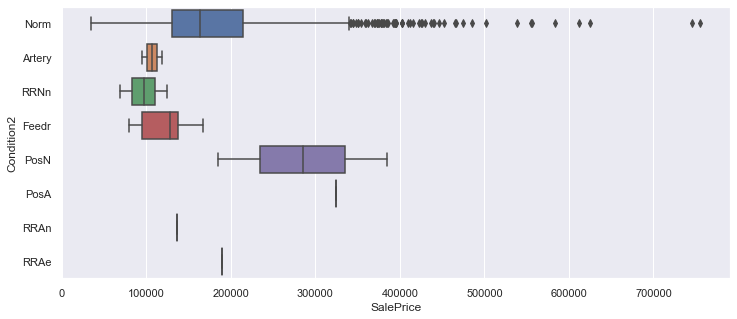

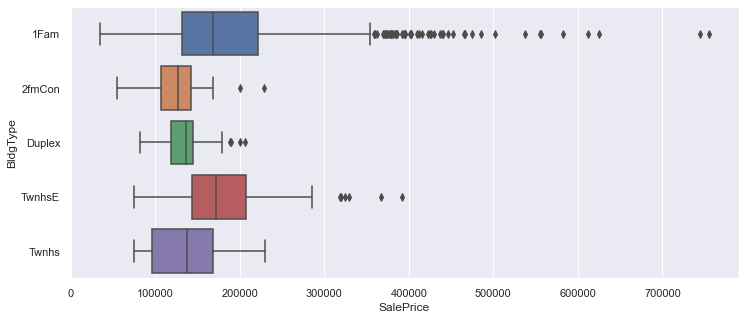

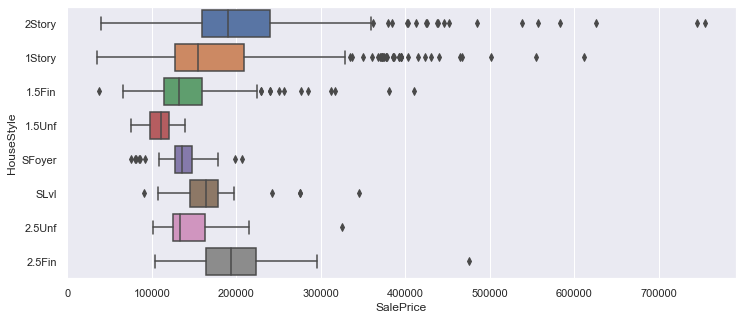

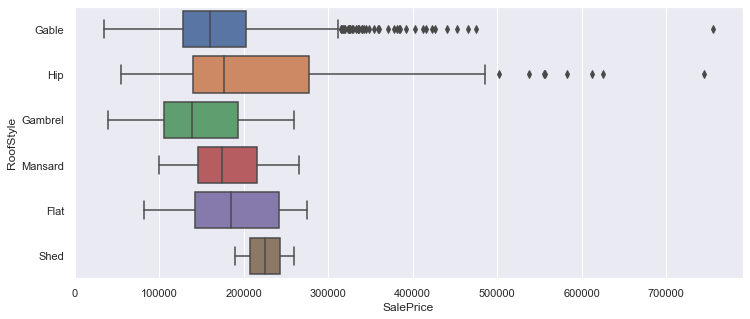

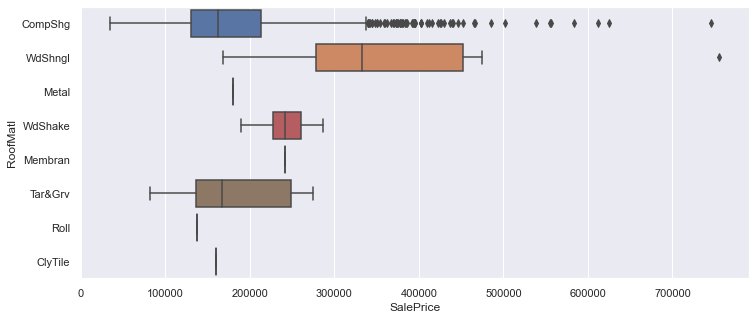

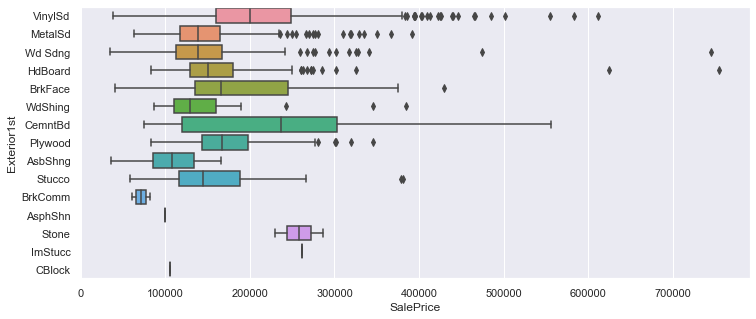

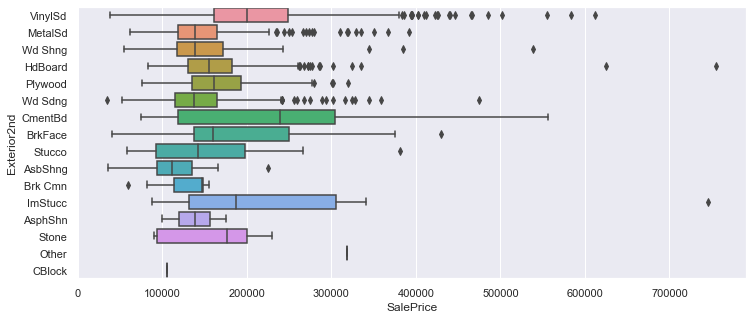

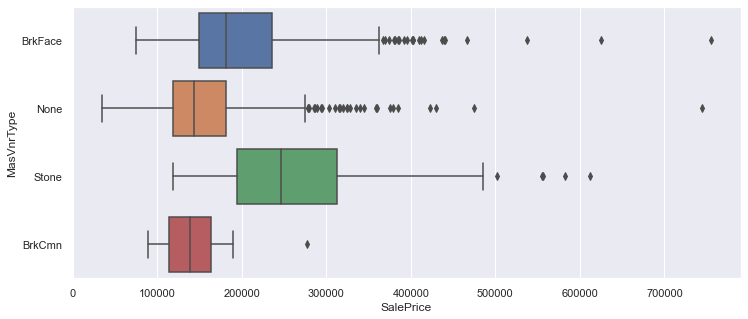

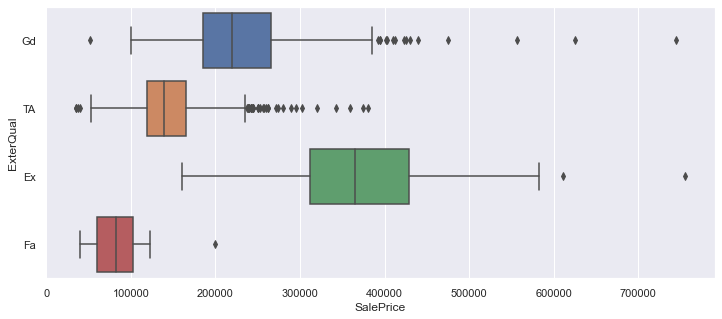

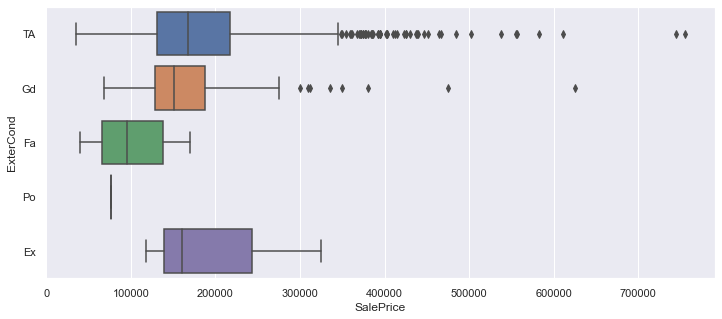

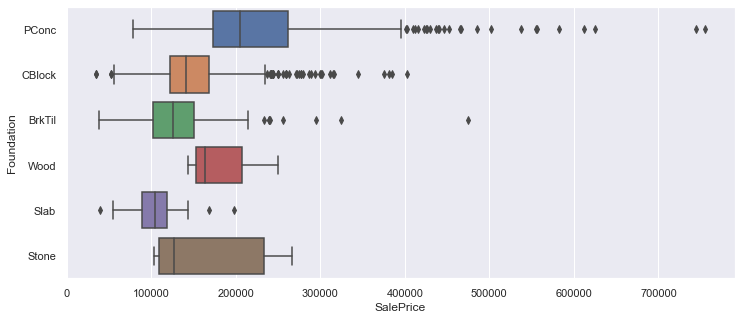

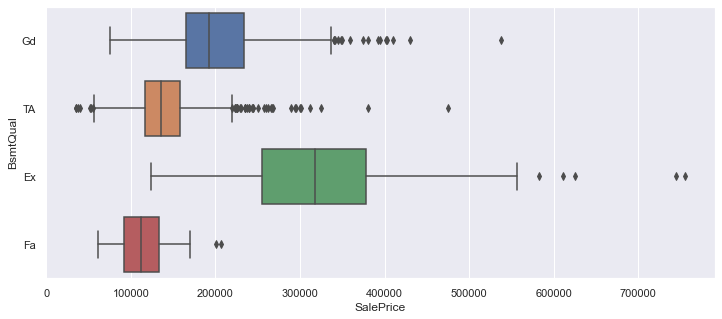

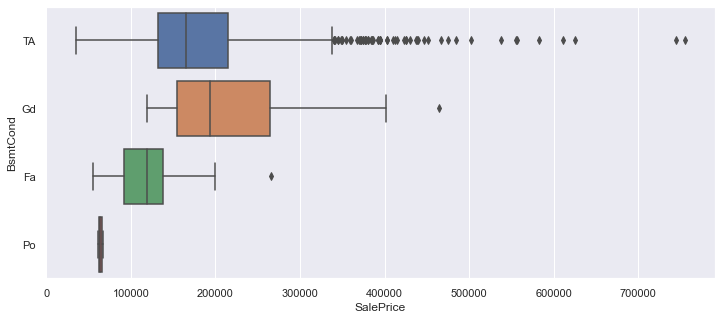

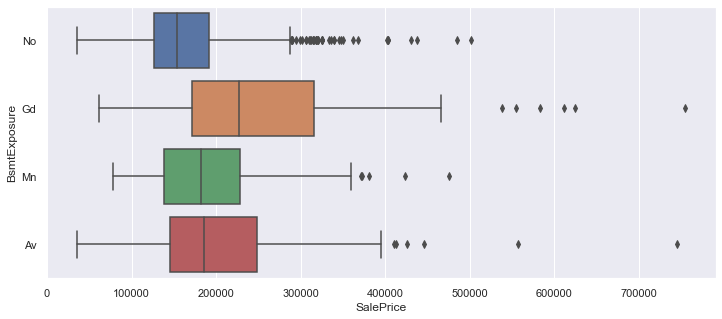

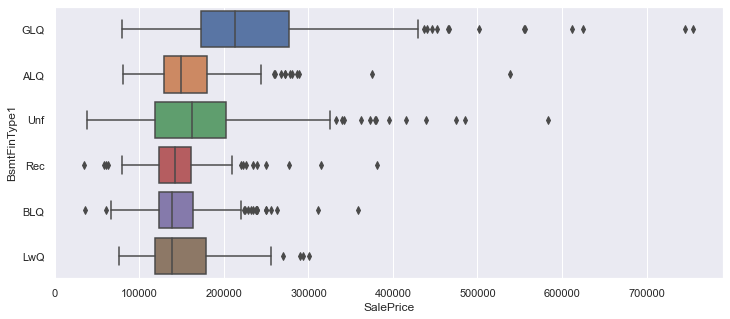

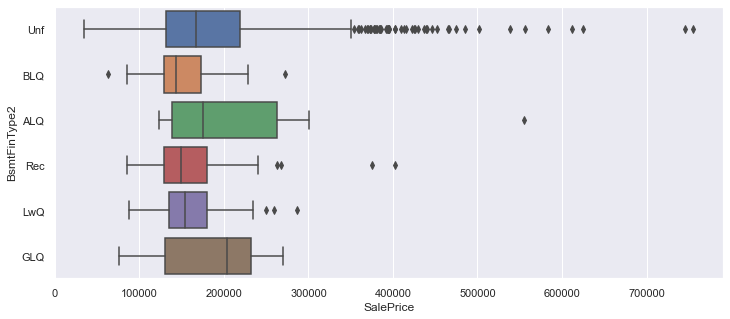

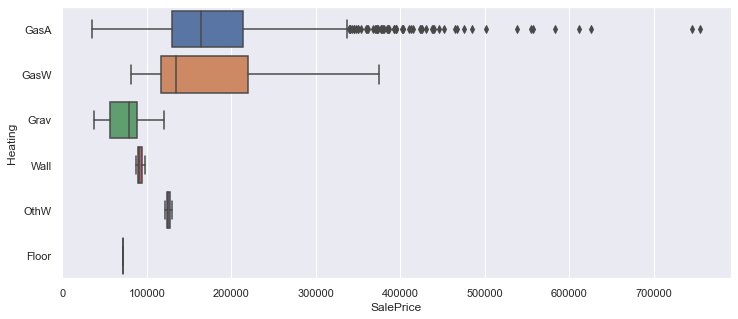

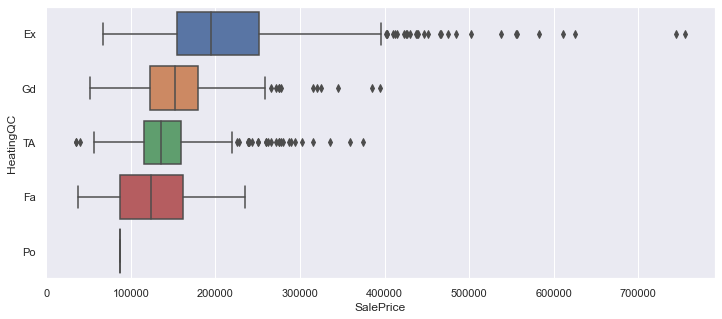

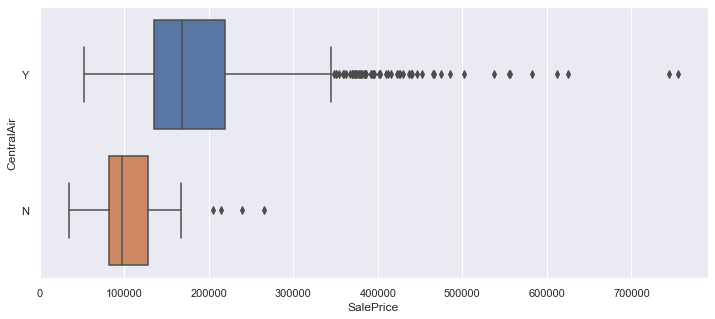

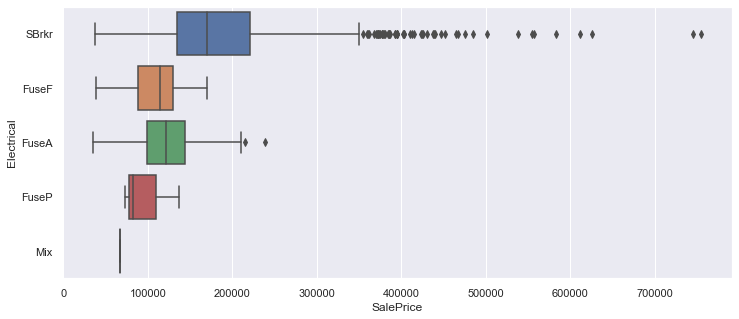

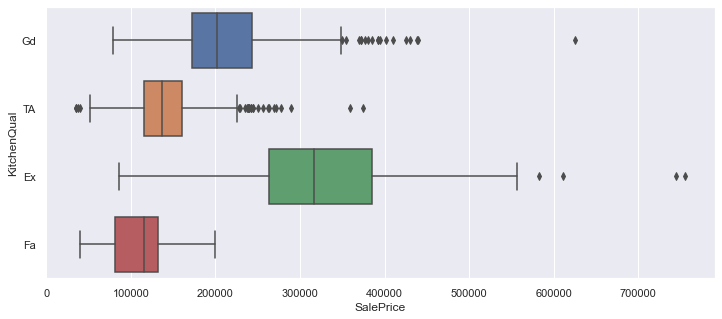

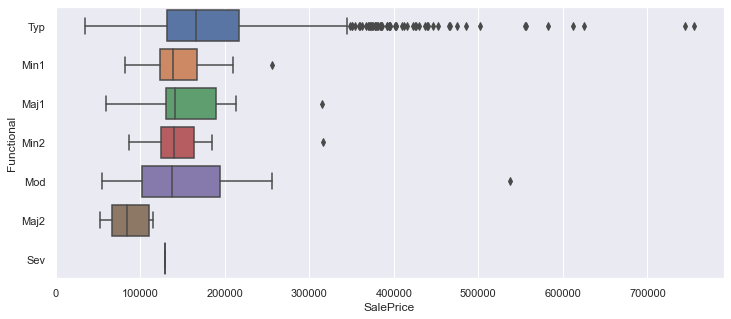

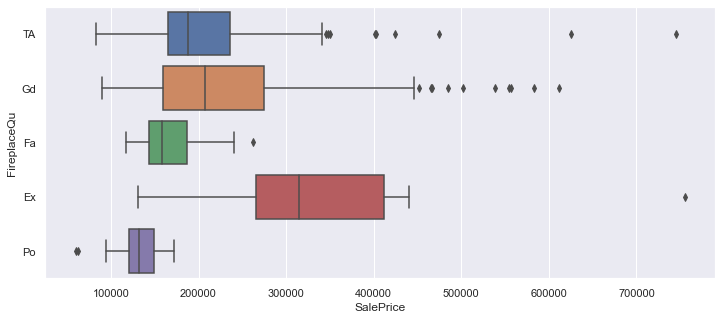

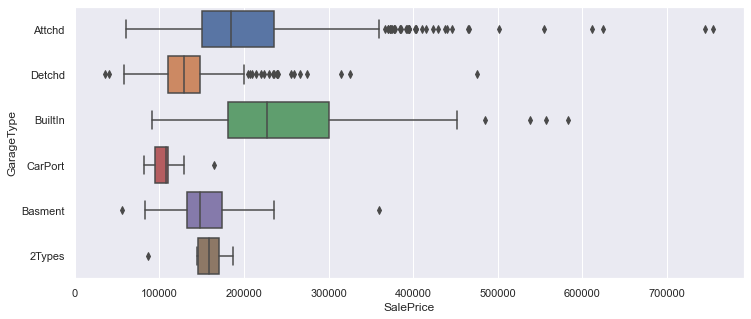

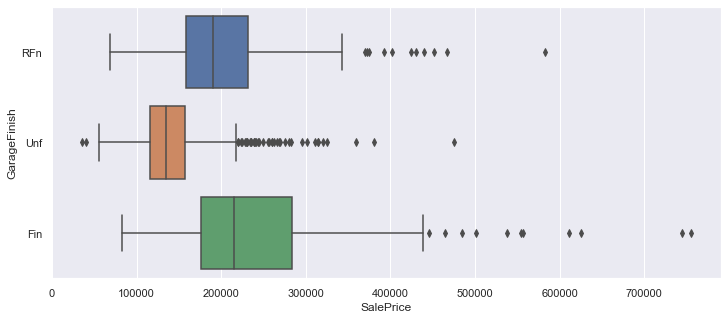

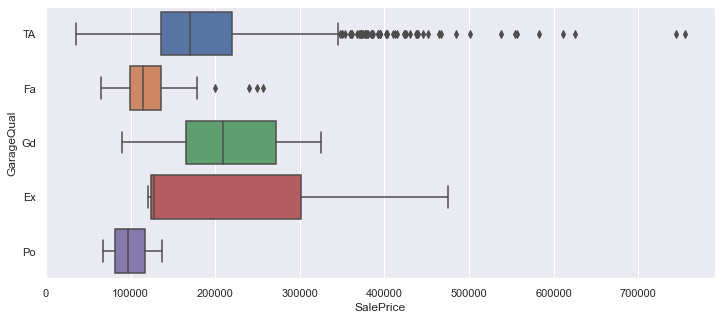

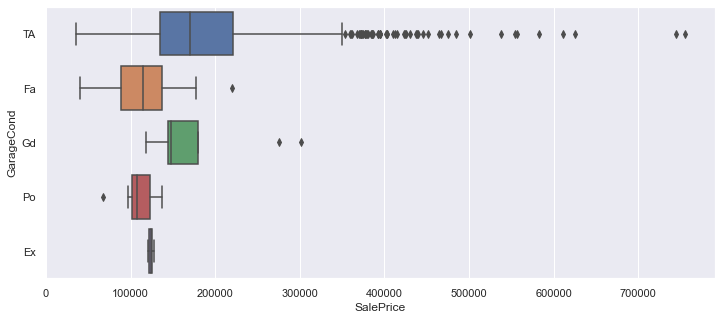

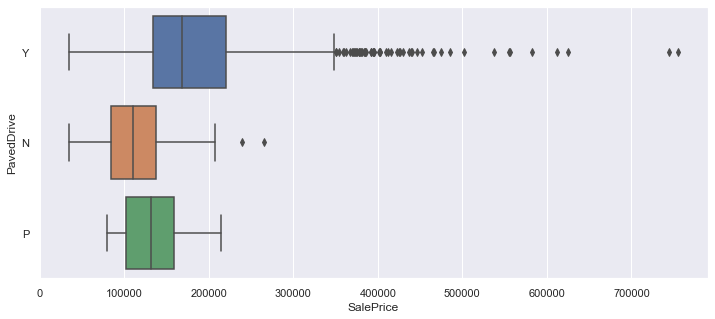

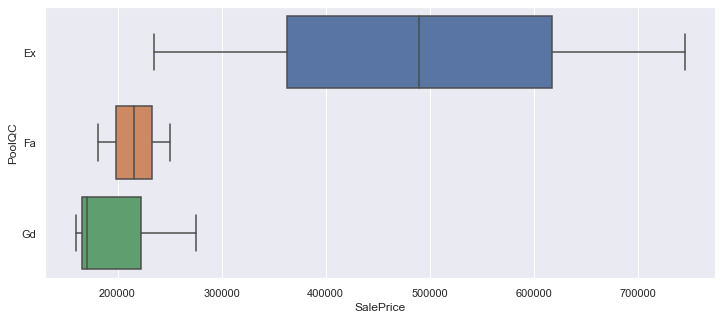

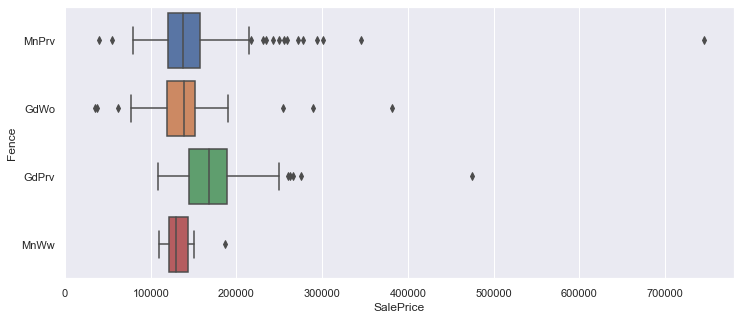

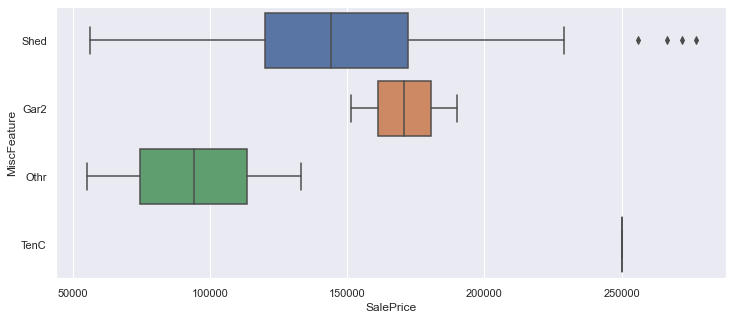

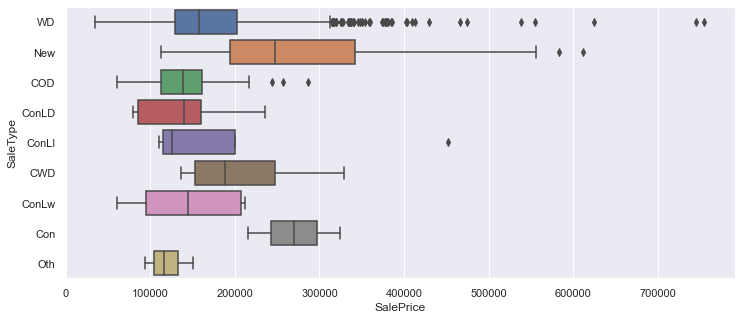

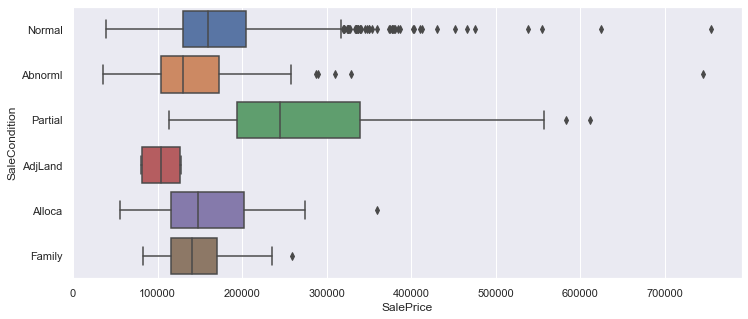

In [138]:
for col in housing_price.select_dtypes("object"):
    plt.figure(figsize=(12,5))
    sns.boxplot(y=col, x="SalePrice", data=data)   

### Qual Variables / target

In [139]:
qual_col = housing_price.columns.str.contains("Qual")
qual_df = housing_price.loc[:,qual_col]
qual_df.drop("LowQualFinSF", axis=1, inplace=True)

mapping = {'Gd':3, 'TA':1, 'Ex':4, 'Fa':2, "Po":0, np.nan:np.nan}
# string to cat
qual_df.iloc[:,1:] = qual_df.iloc[:,1:].applymap(lambda x: mapping[x]).values
qual_df = qual_df.join(housing_price.SalePrice)
qual_df.corr().SalePrice.sort_values(ascending=False)
# plt.figure(figsize=(12,8))
# sns.heatmap(corr_matrix, cbar=False, cmap="Blues", annot=True)

/Users/axel/ml/venv/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/axel/ml/venv/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



SalePrice      1.000000
OverallQual    0.790982
ExterQual      0.650130
KitchenQual    0.619235
BsmtQual       0.599821
GarageQual    -0.040955
Name: SalePrice, dtype: float64

In [140]:
# GarageQual seems to have outliers 95% of values in TA: Average
housing_price["GarageQual"].value_counts(normalize=True)

TA    0.950689
Fa    0.034808
Gd    0.010152
Po    0.002175
Ex    0.002175
Name: GarageQual, dtype: float64

### Area atributes / target  
strong correlation

In [141]:
area_col = housing_price.columns.str.contains("Area|SF") 
area_df = housing_price.loc[:,area_col].join(housing_price.SalePrice)
area_df.corr().SalePrice.sort_values(ascending=False)
# plt.figure(figsize=(12,8))
# sns.heatmap(df.corr(), cbar=False, cmap="Blues", annot=True)

SalePrice       1.000000
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
MasVnrArea      0.477493
BsmtFinSF1      0.386420
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
LotArea         0.263843
BsmtUnfSF       0.214479
PoolArea        0.092404
BsmtFinSF2     -0.011378
LowQualFinSF   -0.025606
Name: SalePrice, dtype: float64

## Detailed Analysis

### Relation variable / variables

**1. area / area**  
some variable with strong correlation

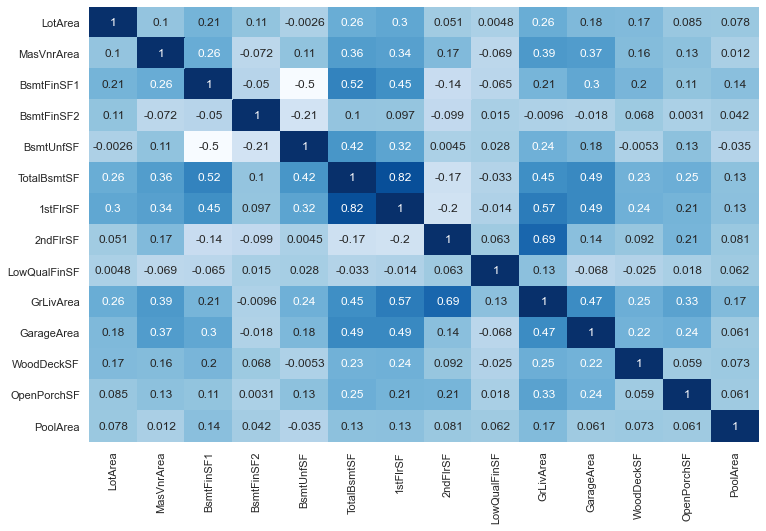

In [142]:
plt.figure(figsize=(12,8))
sns.heatmap(area_df.drop("SalePrice",axis=1).corr(), cbar=False, cmap="Blues", annot=True)

**2.quality / quality**  
strong correlation

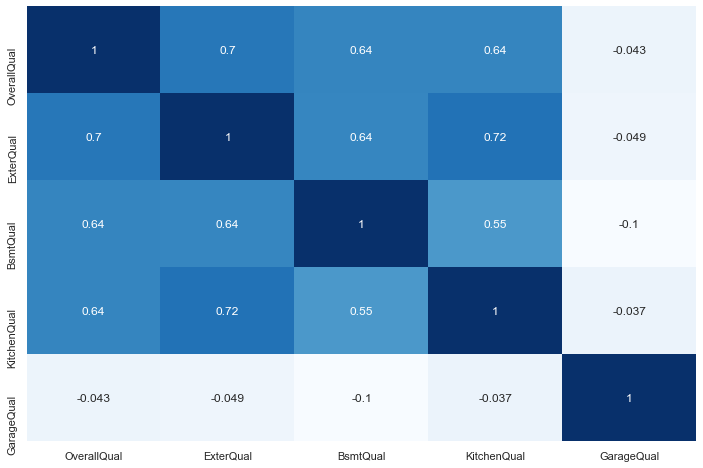

In [143]:
plt.figure(figsize=(12,8))
sns.heatmap(qual_df.drop("SalePrice",axis=1).corr(), cbar=False, cmap="Blues", annot=True)

**3.quality / area**   
correlation : people with a high quality house have a big house

In [144]:
df = qual_df.join(area_df.drop("SalePrice", axis=1))
housing_price[["GrLivArea", "OverallQual"]].corr()

,GrLivArea,OverallQual
GrLivArea,1.000000,0.593007
OverallQual,0.593007,1.000000


**4. Neighboorhood / over all quality**  
weak correlation

In [145]:
neighboor_dum = pd.get_dummies(housing_price.Neighborhood)
df = neighboor_dum.join(housing_price.OverallQual)
df.corr()["OverallQual"].sort_values(ascending=False)

OverallQual    1.000000
NridgHt        0.368724
NoRidge        0.224693
Somerst        0.224010
StoneBr        0.196736
CollgCr        0.132337
Timber         0.125168
Blmngtn        0.084566
Gilbert        0.079173
Veenker        0.039575
NWAmes         0.038075
SawyerW        0.033059
Crawfor        0.024109
Blueste       -0.002661
NPkVill       -0.005658
ClearCr       -0.020882
BrDale        -0.031355
SWISU         -0.062946
Mitchel       -0.068404
MeadowV       -0.127870
OldTown       -0.148731
BrkSide       -0.154120
IDOTRR        -0.156588
Sawyer        -0.179215
Edwards       -0.199925
NAmes         -0.228252
Name: OverallQual, dtype: float64

**5. Neighboorhood / Ground living Area**  
weak correlation

In [146]:
df = neighboor_dum.join(housing_price.GrLivArea)
df.corr()["GrLivArea"].sort_values(ascending=False)

GrLivArea    1.000000
NoRidge      0.321450
NridgHt      0.179892
Crawfor      0.100013
NWAmes       0.092726
StoneBr      0.091365
Timber       0.072790
ClearCr      0.072576
SWISU        0.071806
Gilbert      0.057302
Somerst      0.038667
SawyerW      0.031078
Veenker      0.004009
Blueste     -0.008670
Blmngtn     -0.018084
OldTown     -0.019705
CollgCr     -0.022523
NPkVill     -0.039350
BrDale      -0.074599
Mitchel     -0.078493
Edwards     -0.090555
MeadowV     -0.094329
IDOTRR      -0.114550
BrkSide     -0.120958
Sawyer      -0.132106
NAmes       -0.166697
Name: GrLivArea, dtype: float64

### Feature Engineering
create boolean attribute to detect features like pool, fence, alley, garage basement 2nd floor 

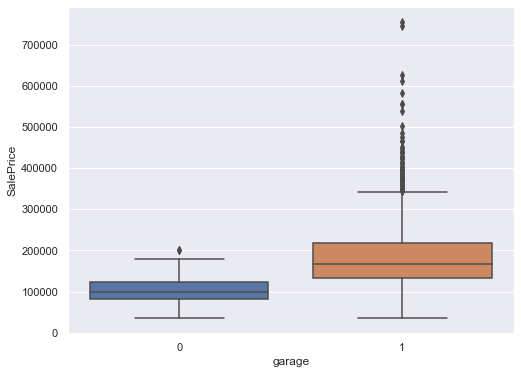

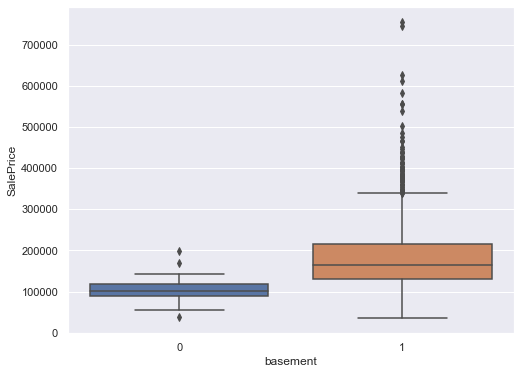

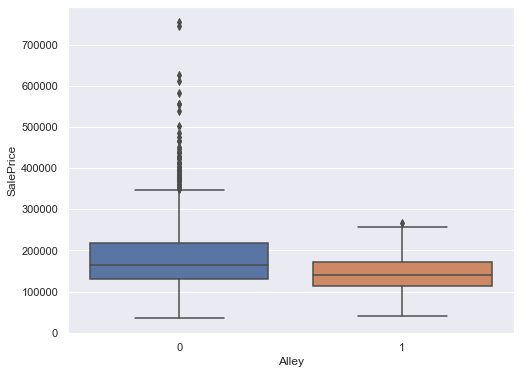

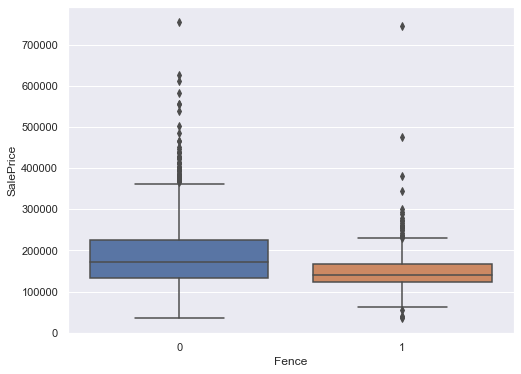

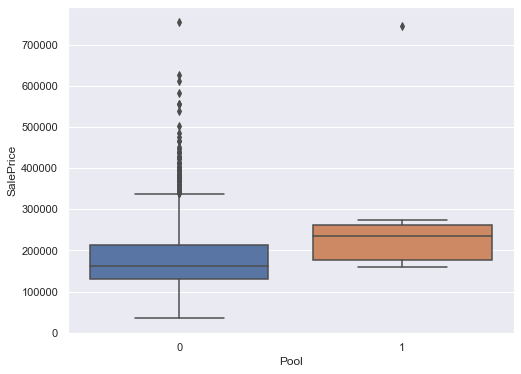

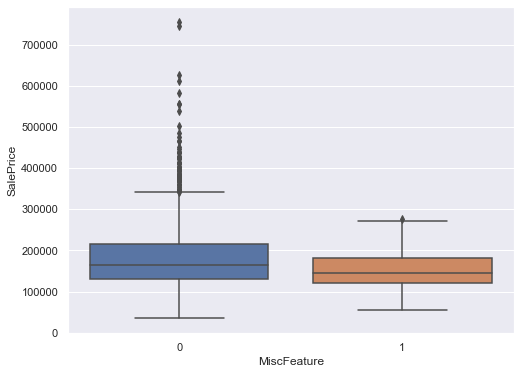

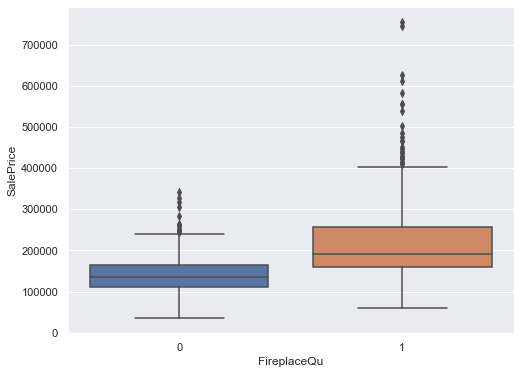

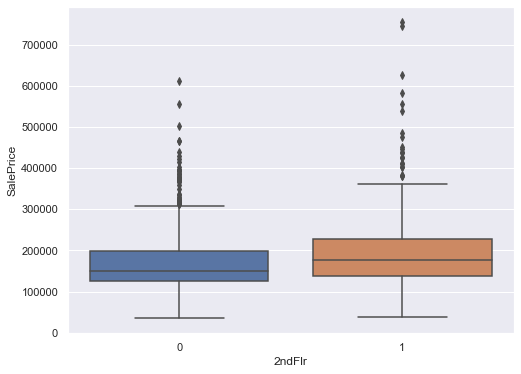

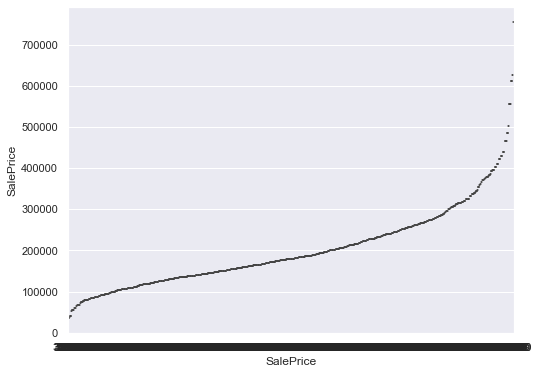

In [147]:
features_col = ["GarageCond", "BsmtCond", "Alley", "Fence", "PoolQC", "MiscFeature", "FireplaceQu"]
df = housing_price[features_col].notnull().astype("int")
df = df.join((housing_price["2ndFlrSF"] > 0).astype("int"))
df.rename(columns={
    "GarageCond":"garage", 
    "BsmtCond":"basement", 
    "2ndFlrSF":"2ndFlr",
    "PoolQC":"Pool",
    }, inplace=True)

df = df.join(housing_price.SalePrice)
df
for col in df:
    plt.figure(figsize=(8,6))
    sns.boxplot(y="SalePrice", x=col, data=df)

# 2. Pre-Processing
---
idea:
- 💬 feature engineering the different home's feature (Pool, Basement, Garage ...)   
↳ not working

simply delete the columns with more than 15 % and ID col

In [148]:
dataset = data.copy()

# delete useless column
# dataset.drop(columns="Id", inplace=True)
dataset.set_index("Id", inplace=True)

# missing_rate = dataset.isna().sum()/ dataset.shape[0]
# missing_rate.sort_values(ascending=False)
# columns = dataset.columns[missing_rate < 0.15]
# dataset = dataset[columns]

In [149]:
# def feature_engineering(dataset):
    
#     # create columns for different home feature such as pool, fence or basement .. 
#     features_col = ["GarageCond", "BsmtCond", "Alley", "Fence", "PoolQC", "MiscFeature", "FireplaceQu"]
#     df = housing_price[features_col].notnull().astype("int")
#     df = df.join((housing_price["2ndFlrSF"] > 0).astype("int"))

#     df.rename(columns={
#         "GarageCond":"garage", 
#         "BsmtCond":"basement", 
#         "2ndFlrSF":"2ndFlr",
#         "PoolQC":"Pool",
#         "FireplaceQu":"Fireplace",
#         }, inplace=True)
#     return dataset.join(df)
    

In [150]:
def encodage(df):
    
    # quality cat → number
    quality_ranking = {'Ex':4, 'Gd':3, 'Fa':2, 'TA':1, "Po":0}
    quality_col = df.isin(["TA"]).any(0)
    for col in df.loc[:,quality_col]:
        df.loc[:,col] = df[col].map(quality_ranking)
    
    # boolean cat → int (only one Central air)
    yes_no_mapping = {"Y":1, "N":0}
    df.loc[:,"CentralAir"] = df.CentralAir.map(yes_no_mapping)
    
    # multiple categories → dummies
    dummies = pd.get_dummies(df.select_dtypes("object"))
    
    return df.select_dtypes(exclude="object").join(dummies)

In [151]:
def imputation(df):
    df.fillna(-999, inplace=True)
#     df.dropna(axis=0, inplace=True)
    return df

In [152]:
from sklearn.ensemble import IsolationForest

def remove_outlier(df):
    outliers = IsolationForest(random_state=42, contamination=0.05)
    outliers.fit(df)
    no_outliers = (outliers.predict(df) == 1)
    return df.loc[no_outliers,:]

In [153]:
def preprocessing(df, sub=False):
#     df = feature_engineering(df)
    df = encodage(df)
    df = imputation(df)
    df = remove_outlier(df)
    
    if not sub:
        X = df.drop("SalePrice", axis=1)
        y = df["SalePrice"]
        return X, y
    else:
        return df

In [203]:
# split into test and train set
from sklearn.model_selection import train_test_split

X_full, y_full = preprocessing(dataset)
X_train, X_test, y_train, y_test  = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

___

# 3. Preprocessing (Sklearn)
---

In [155]:
# dataset = data.copy()
# dataset.drop("Id", axis=1, inplace=True)

### 3.1 Spliting 

In [156]:
# X_full = dataset.drop("SalePrice", axis=1)
# y_full = dataset["SalePrice"]
# X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

### 3.2 Simple Preprocessing

In [157]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

#### a. num pipeline

In [158]:
# num_pipeline = SimpleImputer(strategy="constant", fill_value=-999)

#### b. cat pipeline

In [159]:
# imputation = SimpleImputer(strategy="constant", fill_value="None")
# cat_pipeline = make_pipeline(imputation, OneHotEncoder(handle_unknown="ignore"))

#### c. full pipeline

In [160]:
# cat_atrib = X_full.select_dtypes("object").columns
# num_atrib = X_full.select_dtypes(exclude="object").columns
# preprocessing = make_column_transformer(
#     (num_pipeline, num_atrib),
#     (cat_pipeline, cat_atrib))

In [161]:
# full preprocessing
# print(f"TRAINING shape:{preprocessing.fit_transform(X_train).shape}")
# print(f"TESTING shape:{preprocessing.transform(X_test).shape}")

### 3.3 Advanced preprocessing

#### remove outliers

In [162]:
# from sklearn.ensemble import IsolationForest

# def train_preprocesing(X, y):
#     X = preprocessing.fit_transform(X)
    
#     outliers = IsolationForest(random_state=42, contamination=0.05)
#     outliers.fit(X)
#     index = np.where(outliers.predict(X)==1)[0]

#     return X[index], y.iloc[index]

In [163]:
# X_train_prep, y_train_prep = train_preprocesing(X_train, y_train)

In [164]:
# X_train_prep

In [165]:
# y_train_prep.shape

#### feature selection

In [166]:
from sklearn.feature_selection import SelectKBest, f_regression, VarianceThreshold

selection = make_pipeline(VarianceThreshold(threshold=0.05),SelectKBest(f_regression, k=10))

### 3.4 Evaluation

In [167]:
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.tree import DecisionTreeRegressor

In [168]:
model = make_pipeline(selection, DecisionTreeRegressor(random_state=42))

In [169]:
def evaluation(model):
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring="neg_mean_squared_error")
    score = np.sqrt(-scores)
    print(f"RMSE:{score.mean():.2f}(+/- {score.std():.2f})")
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                               cv=3, scoring="neg_mean_squared_error",
                                               train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(12,8))
    plt.plot(N, np.sqrt(-train_score.mean(axis=1)), label="train score")
    plt.plot(N, np.sqrt(-val_score.mean(axis=1)), label="val score")
    plt.legend()

RMSE:42416.18(+/- 2778.91)


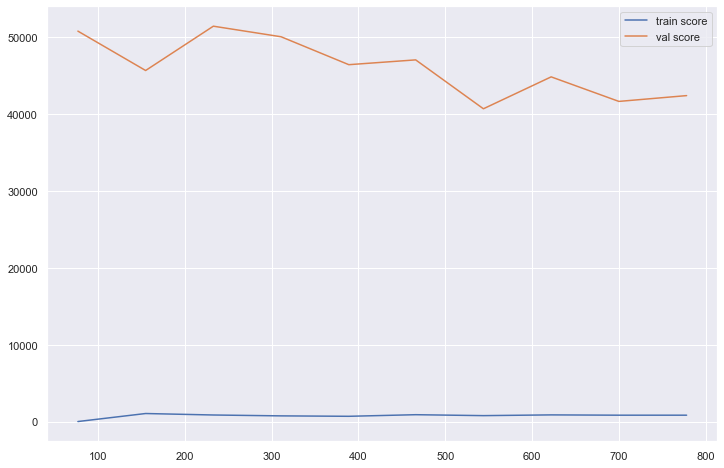

In [170]:
evaluation(model)

In [171]:
# pd.DataFrame(model.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)[:10].plot.barh()

## 3. Model Selection
---

In [172]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

preprocessor = make_pipeline(VarianceThreshold(threshold=0.05),SelectKBest(f_regression, k=50))

In [173]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor

In [174]:
RandomForest = make_pipeline(preprocessor, RandomForestRegressor(random_state=42))
# ExtraTree = make_pipeline(preprocessor, ExtraTreesRegressor(random_state=42)) 
AdaBoost = make_pipeline(preprocessor, AdaBoostRegressor(random_state=42))
SVM_linear = make_pipeline(preprocessor, StandardScaler(), SVR(kernel="linear"))
SVM_rbf = make_pipeline(preprocessor, StandardScaler(), SVR(kernel="rbf"))
Lasso_reg = make_pipeline(preprocessor, StandardScaler(), Lasso(random_state=42, max_iter=1e5))
Ridge_reg = make_pipeline(preprocessor, StandardScaler(), Ridge(random_state=42, max_iter=1e5))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsRegressor())

In [175]:
# create a class to keep track of the performance
class CompareModels():
    def __init__(self, models, X, y, scoring="neg_mean_squared_error"):
        self.models = models
        self.scoring = scoring
        self.names = []
        self.scores = []
        self.X = X
        self.y = y
        
    def get_scores(self):
        for name, model in self.models.items():
            score = cross_val_score(model, self.X, self.y, scoring=self.scoring, cv=7)
            score = np.sqrt(-score)
            self.names.append(name)
            self.scores.append(np.array(score))
            print(f"{name:-<20}> {score.mean():.2f} (+/-{(score).std():.2f})")


    def create_table(self):
        self.table = pd.DataFrame({model:scores for model,scores in zip(self.names, self.scores)})
        self.table.columns.name = "Model"
        self.table = self.table.unstack().reset_index(0)
        self.table = self.table.rename(columns={0:self.scoring})
            
    def summary_table(self):
        return self.table.groupby("Model").mean().reset_index()
    
    def box_plot(self):
        fig = px.box(self.table, y=self.scoring, x="Model")
        fig.update_layout(title="Compare Models")
        fig.show()
        
    def learning_curve(self):
        for name, model in self.models.items():
            N, train_score, val_score = learning_curve(model, self.X, self.y, cv=3, 
                                                       scoring="neg_mean_squared_error",
                                                       train_sizes=np.linspace(0.1,1,10))
            plt.figure(figsize=(12,8))
            plt.plot(N, np.sqrt(-train_score.mean(axis=1)), label="train score")
            plt.plot(N, np.sqrt(-val_score.mean(axis=1)), label="val score")
            plt.title(name)
            plt.legend()
    
    def recap(self):
        self.get_scores()
        self.create_table()
        self.box_plot()
        display(self.summary_table().sort_values(by=self.scoring,ascending=False))  

In [176]:
list_of_models = {
    "RandomForest":RandomForest, 
    "AdaBoost":AdaBoost, 
    "SVM_linear":SVM_linear, 
    "SVM_rbf":SVM_rbf, 
    "Lasso":Lasso_reg, 
    "Ridge":Ridge_reg, 
    "KNN":KNN
}

In [177]:
models = CompareModels(list_of_models, X_train, y_train)
models.recap()

RandomForest--------> 31760.89 (+/-10061.66)
AdaBoost------------> 36848.32 (+/-8775.50)
SVM_linear----------> 71622.24 (+/-6086.42)
SVM_rbf-------------> 78715.66 (+/-6144.49)


/Users/axel/ml/venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 74759885023.2893, tolerance: 606153309.650277

/Users/axel/ml/venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 69236880637.76904, tolerance: 573395887.3077549

/Users/axel/ml/venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 45356707576.44824, tolerance: 610747124.2796992

/Users/axel/ml/venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2698078

Lasso---------------> 37266.82 (+/-15154.87)
Ridge---------------> 37214.35 (+/-15169.54)
KNN-----------------> 38494.69 (+/-6952.54)


,Model,neg_mean_squared_error
6,SVM_rbf,78715.663475
5,SVM_linear,71622.240012
1,KNN,38494.691742
2,Lasso,37266.823835
4,Ridge,37214.346116
0,AdaBoost,36848.320370
3,RandomForest,31760.890983


__Model we will use for tuning__ 
- _KNN_
- _RandomForest_
- _Ridge_

/Users/axel/ml/venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 365041221.67438316, tolerance: 35463948.411098704

/Users/axel/ml/venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 52104287939.594025, tolerance: 101607945.53673936

/Users/axel/ml/venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 99044397501.44601, tolerance: 201772504.48544374

/Users/axel/ml/venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 

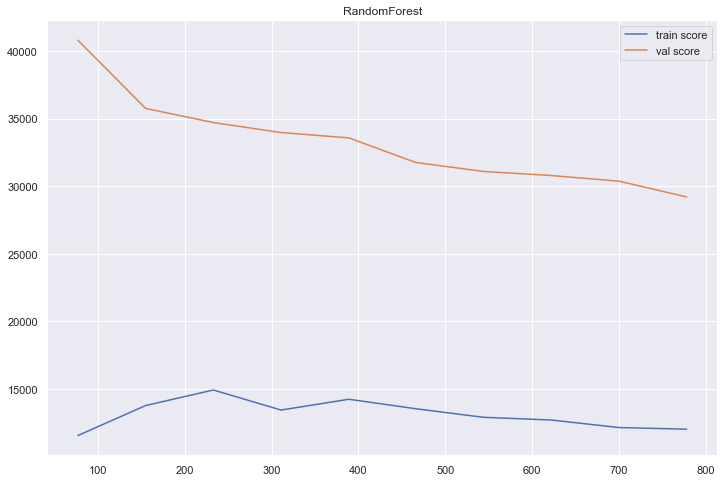

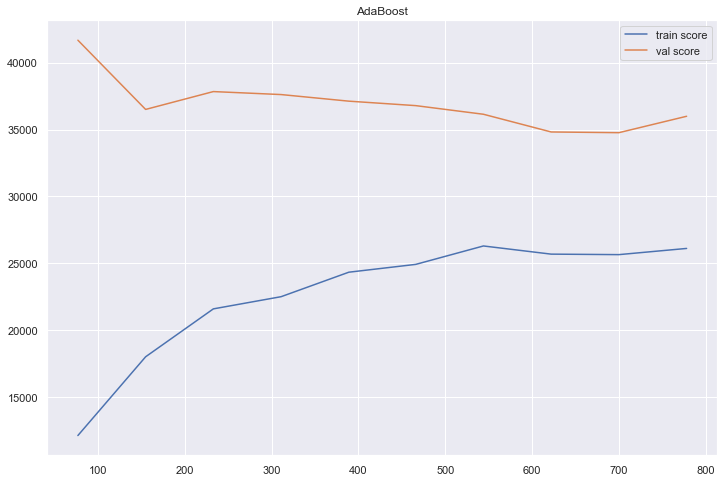

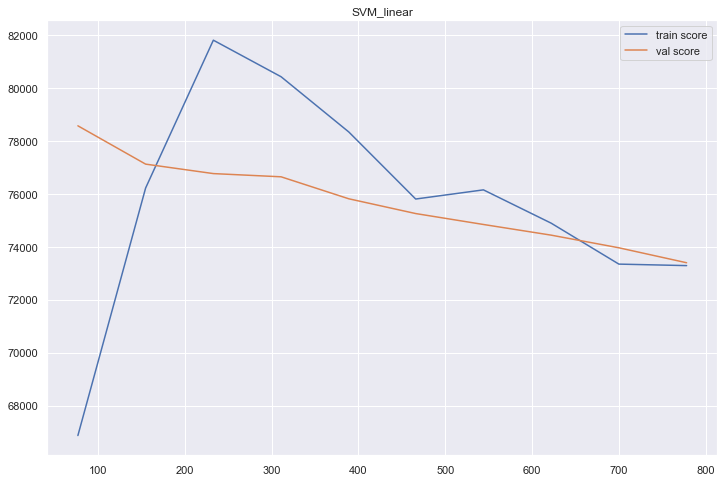

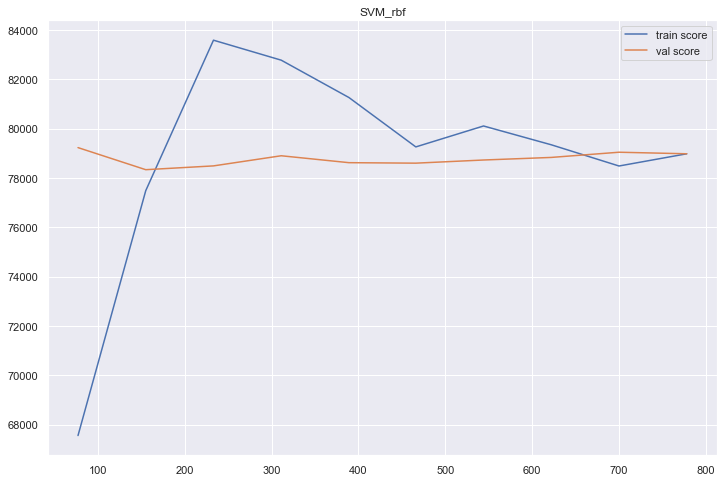

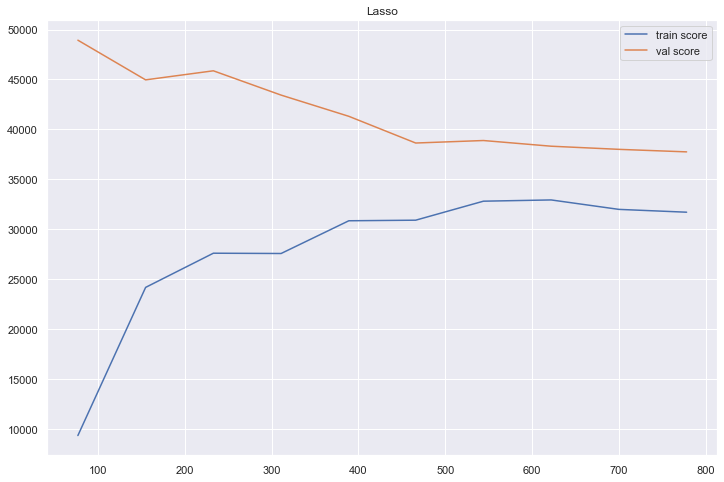

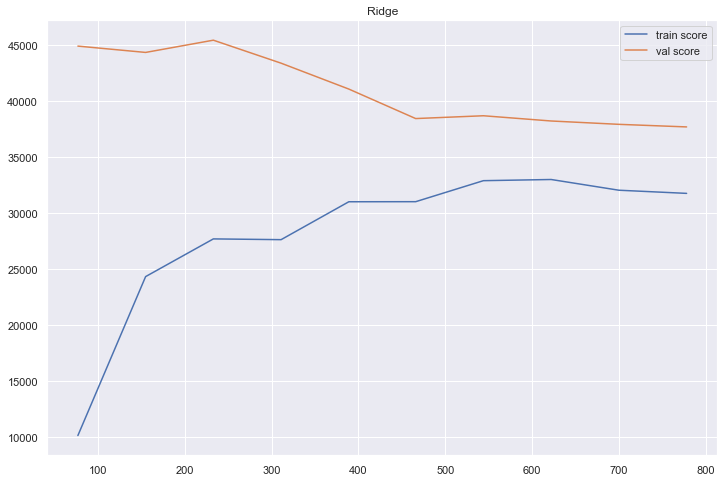

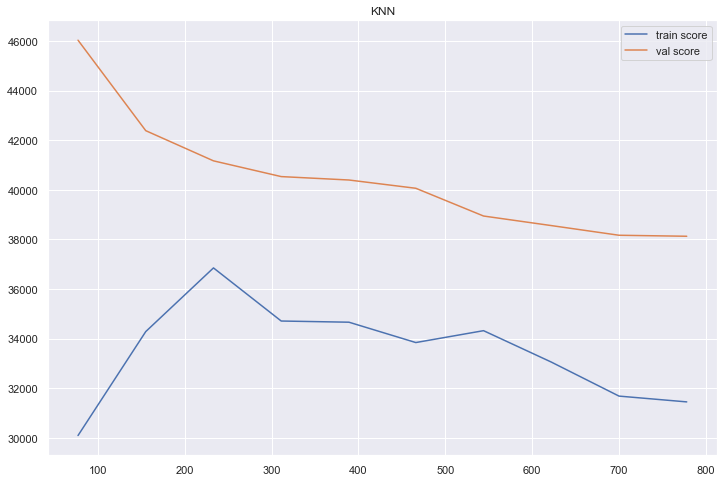

In [178]:
models.learning_curve()

# 4. Fine Tune the model
---

In [179]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#### Random Forest

In [180]:
RandomForest = make_pipeline(preprocessor, RandomForestRegressor(random_state=42, n_estimators=150, n_jobs=-1))
RandomForest

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('variancethreshold',
                                  VarianceThreshold(threshold=0.05)),
                                 ('selectkbest',
                                  SelectKBest(k=50,
                                              score_func=<function f_regression at 0x7fd0e26b9160>))])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=150, n_jobs=-1,
                                       random_state=42))])

In [181]:
hyper_params = {
    "randomforestregressor__max_depth":[20,30,40,50,70,None],
    "randomforestregressor__max_features":["auto", "sqrt"],
    "randomforestregressor__bootstrap":[True, False],
    "pipeline__selectkbest__k":range(50,100)
}

In [182]:
rf_opti = RandomizedSearchCV(RandomForest, hyper_params, scoring="neg_mean_squared_error", cv=4, n_iter=40,
                            random_state=42)
rf_opti.fit(X_train, y_train)
print(f"Best score : {np.sqrt(-rf_opti.best_score_)}")
print(f"Best param: \n{rf_opti.best_params_}")

Best score : 30176.27726281634
Best param: 
{'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__max_depth': 50, 'randomforestregressor__bootstrap': False, 'pipeline__selectkbest__k': 71}


#### Ridge 

In [183]:
Ridge_reg = make_pipeline(preprocessor, StandardScaler(),Ridge(random_state=42))
Ridge_reg

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('variancethreshold',
                                  VarianceThreshold(threshold=0.05)),
                                 ('selectkbest',
                                  SelectKBest(k=50,
                                              score_func=<function f_regression at 0x7fd0e26b9160>))])),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(random_state=42))])

In [184]:
hyper_params = {
    "ridge__alpha":np.linspace(1e-5,1e-3),
#     "ridge__tol":[1e-5,1e-4,1e-3],
    "pipeline__selectkbest__k":range(90,109)
}

In [185]:
ridge_opti = RandomizedSearchCV(Ridge_reg, hyper_params, scoring="neg_mean_squared_error", 
                                cv=4, n_iter=80, random_state=42)
ridge_opti.fit(X_train, y_train)
print(f"Best score : {np.sqrt(-ridge_opti.best_score_)}")
print(f"Best param: \n{ridge_opti.best_params_}")

Best score : 40047.60171591914
Best param: 
{'ridge__alpha': 0.000979795918367347, 'pipeline__selectkbest__k': 93}


#### KNN

In [186]:
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsRegressor())
KNN

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('variancethreshold',
                                  VarianceThreshold(threshold=0.05)),
                                 ('selectkbest',
                                  SelectKBest(k=50,
                                              score_func=<function f_regression at 0x7fd0e26b9160>))])),
                ('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [187]:
hyper_params = {
    "kneighborsregressor__n_neighbors": range(3,10),
    "kneighborsregressor__weights":["uniform","distance"],
    "pipeline__selectkbest__k":range(1,109)
}

In [188]:
knn_opti = RandomizedSearchCV(KNN, hyper_params, scoring="neg_mean_squared_error",
                              n_iter=40, cv=4, random_state=42)
knn_opti.fit(X_train, y_train)
print(f"Best score : {np.sqrt(-knn_opti.best_score_)}")
print(f"Best param: \n{knn_opti.best_params_}")

Best score : 33867.136201047404
Best param: 
{'pipeline__selectkbest__k': 12, 'kneighborsregressor__weights': 'uniform', 'kneighborsregressor__n_neighbors': 8}


### Ensemble methods

#### Vote

In [189]:
from sklearn.ensemble import VotingRegressor

vote = VotingRegressor([("RandomForest", rf_opti.best_estimator_),
                        ("Ridge", ridge_opti.best_estimator_),
                        ("KNN", knn_opti.best_estimator_)])

scores = cross_val_score(vote, X_train, y_train , scoring="neg_mean_squared_error", cv=3)
score = np.sqrt(-scores)
print(f"RMSE: {score.mean():.0f} (+/- {score.std():.0f})")

RMSE: 29523 (+/- 4493)


#### Bagging

In [190]:
from sklearn.ensemble import BaggingRegressor

In [191]:
# KNN
bagging = BaggingRegressor(base_estimator=knn_opti.best_estimator_, n_estimators=100, random_state=42)
scores = cross_val_score(bagging, X_train, y_train, scoring="neg_mean_squared_error", cv=3)
score = np.sqrt(-scores)
print(f"RMSE: {score.mean():.0f} (+/- {score.std():.0f})")

RMSE: 32887 (+/- 3540)


In [192]:
# Ridge
bagging = BaggingRegressor(base_estimator=ridge_opti.best_estimator_, n_estimators=100, random_state=42)
scores = cross_val_score(bagging, X_train, y_train, scoring="neg_mean_squared_error", cv=3)
score = np.sqrt(-scores)
print(f"RMSE: {score.mean():.0f} (+/- {score.std():.0f})")

RMSE: 35574 (+/- 7775)


#### Boosting

In [193]:
from sklearn.ensemble import AdaBoostRegressor

In [194]:
# KNN
boosting = AdaBoostRegressor(base_estimator=knn_opti.best_estimator_, n_estimators=100, random_state=42)
scores = cross_val_score(boosting, X_train, y_train, scoring="neg_mean_squared_error", cv=3)
score = np.sqrt(-scores)
print(f"RMSE: {score.mean():.0f} (+/- {score.std():.0f})")

RMSE: 32129 (+/- 3982)


In [195]:
# Ridge
boosting = AdaBoostRegressor(base_estimator=ridge_opti.best_estimator_, n_estimators=100, random_state=42)
scores = cross_val_score(boosting, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
score = np.sqrt(-scores)
print(f"RMSE: {score.mean():.0f} (+/- {score.std():.0f})")

RMSE: 49010 (+/- 4968)


#### Stacking

In [196]:
from sklearn.ensemble import StackingRegressor

In [197]:
stack = StackingRegressor([("RandomForest", rf_opti.best_estimator_),
                        ("Ridge", ridge_opti.best_estimator_),
                        ("KNN", knn_opti.best_estimator_)],
                        final_estimator=KNeighborsRegressor())

scores = cross_val_score(stack, X_train, y_train , scoring="neg_mean_squared_error", cv=3)
score = np.sqrt(-scores)
print(f"RMSE: {score.mean():.0f} (+/- {score.std():.0f})")

RMSE: 28380 (+/- 4161)


# 5. Evaluate on the Test 
---

In [198]:
from sklearn.metrics import mean_squared_error

final_model = stack
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
final_rmse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_rmse)
print(final_rmse)

28283.327959655395


In [199]:
X_test.shape

(292, 255)

### prepare submission file for kaggle

In [200]:
def preprocessing(df, sub=False):
#     df = feature_engineering(df)
    df = encodage(df)
    df = imputation(df)
#     df = remove_outlier(df)
    
    if not sub:
        X = df.drop("SalePrice", axis=1)
        y = df["SalePrice"]
        return X, y
    else:
        return df

In [202]:
final_model

StackingRegressor(estimators=[('RandomForest',
                               Pipeline(steps=[('pipeline',
                                                Pipeline(steps=[('variancethreshold',
                                                                 VarianceThreshold(threshold=0.05)),
                                                                ('selectkbest',
                                                                 SelectKBest(k=71,
                                                                             score_func=<function f_regression at 0x7fd0e26b9160>))])),
                                               ('randomforestregressor',
                                                RandomForestRegressor(bootstrap=False,
                                                                      max_depth=50,
                                                                      max_features='sqrt',
                                                                      n_

In [201]:
X_sub = pd.read_csv("data/test.csv")
X_sub = preprocessing(X_sub, sub=True)
final_model.predict(X_sub)

ValueError: X has a different shape than during fitting.

In [ ]:
submission = pd.DataFrame({"Id":X_test.index,"SalePrice":y_pred})
submission.to_csv("submission.csv", index=False)

In [ ]:
pd.read_csv("data/test.csv")

In [ ]:
pd.read_csv("data/sample_submission.csv")